# **W6W7W8 Python Assignment**

There are 2 data that we used in this assignment :
1. [Users](https://docs.google.com/spreadsheets/d/1lpgEsdfY0E179z9Av2euFTVIR66lfWl4SBbyhJyp22o/edit#gid=853726905)
2. [Daily User Balance](https://docs.google.com/spreadsheets/d/1W_Z8FTyN-UziiwRc381T6hRV8Yz-sOOL1m_cPc8Cu2Y/edit#gid=1154623062) 
3. [Goverment Bond](https://docs.google.com/spreadsheets/d/1zeZlui5J4Un7gAb1Mv_Zj13wSqfKQWeOtJgInX4ZtCg/edit#gid=1254201307) 

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

**Silhouette Libraries**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

# **Load Dataset**

> **Create Function to Transform CSV URL**

In [ ]:
def transform_url(url):
  trf_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  return trf_url

> **Users Data**

In [ ]:
users_url = transform_url('https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing')
df_users = pd.read_csv(users_url)
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


> **Daily User Balance Data**

In [ ]:
daily_user_bal_url = transform_url('https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing')
df_daily_user_bal = pd.read_csv(daily_user_bal_url)
df_daily_user_bal

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


# **MILESTONE 1**

---

## **Data Transformation**

### **End Of Period AUM and Balance**

To see the end-of-period AUM and end-of-period invested amount, we only need to look at our data at the end of each month, which is August 31, 2021 and September 30, 2021.

In [ ]:
df_end_of_period = df_daily_user_bal[(df_daily_user_bal['date'] == '2021-08-31') | (df_daily_user_bal['date'] == '2021-09-30')]
df_end_of_period

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9943587.0,10000000.0,0.0
24,50961,2021-08-31,716057.0,700000.0,NaN,100049.0,100000.0,NaN,200117.0,200000.0,NaN,NaN,NaN,NaN
46,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,1200000.0,NaN,NaN,NaN
52,53759,2021-08-31,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,20000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


Drop the transaction columns, as we only need AUM and balance to calculate profit. Then rename our column name with the type of mutual fund in English.

In [ ]:
df_end_of_period.drop(['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'],axis=1,inplace=True)
df_end_of_period.rename(columns = {'Saham_AUM':'Stocks_AUM_end', 'Saham_invested_amount':'Stocks_invested_amount_end',
                             'Pasar_Uang_AUM':'MoneyMarket_AUM_end', 'Pasar_Uang_invested_amount':'MoneyMarket_invested_amount_end',
                             'Pendapatan_Tetap_AUM':'Bond_AUM_end', 'Pendapatan_Tetap_invested_amount':'Bond_invested_amount_end',
                             'Campuran_AUM':'Mixed_AUM_end', 'Campuran_invested_amount':'Mixed_invested_amount_end'}, inplace = True)
df_end_of_period

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,user_id,date,Stocks_AUM_end,Stocks_invested_amount_end,MoneyMarket_AUM_end,MoneyMarket_invested_amount_end,Bond_AUM_end,Bond_invested_amount_end,Mixed_AUM_end,Mixed_invested_amount_end
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.0,10000000.0
24,50961,2021-08-31,716057.0,700000.0,100049.0,100000.0,200117.0,200000.0,NaN,NaN
46,50961,2021-09-30,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,NaN,NaN
52,53759,2021-08-31,70839.0,70000.0,10006.0,10000.0,20066.0,20000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,10001.0,10000.0,49869.0,50000.0,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN


To calculate profit, we find the difference between AUM and Invested Amount.

In [ ]:
df_end_of_period = df_end_of_period.assign(
    Stocks_profit = df_end_of_period['Stocks_AUM_end']-df_end_of_period['Stocks_invested_amount_end'],
    MoneyMarket_profit = df_end_of_period['MoneyMarket_AUM_end']-df_end_of_period['MoneyMarket_invested_amount_end'],
    Bond_profit = df_end_of_period['Bond_AUM_end']-df_end_of_period['Bond_invested_amount_end'],
    Mixed_profit = df_end_of_period['Mixed_AUM_end']-df_end_of_period['Mixed_invested_amount_end'],
)
df_end_of_period

,user_id,date,Stocks_AUM_end,Stocks_invested_amount_end,MoneyMarket_AUM_end,MoneyMarket_invested_amount_end,Bond_AUM_end,Bond_invested_amount_end,Mixed_AUM_end,Mixed_invested_amount_end,Stocks_profit,MoneyMarket_profit,Bond_profit,Mixed_profit
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,NaN,NaN,NaN,206945.0
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.0,10000000.0,NaN,NaN,NaN,-56413.0
24,50961,2021-08-31,716057.0,700000.0,100049.0,100000.0,200117.0,200000.0,NaN,NaN,16057.0,49.0,117.0,NaN
46,50961,2021-09-30,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,NaN,NaN,63909.0,603.0,-1002.0,NaN
52,53759,2021-08-31,70839.0,70000.0,10006.0,10000.0,20066.0,20000.0,NaN,NaN,839.0,6.0,66.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,10001.0,10000.0,49869.0,50000.0,NaN,NaN,1625.0,1.0,-131.0,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN,-13.0,NaN


### **Create Aggregate for Total Buy, Total Sell, Net, and Frequency**

First, we need the month column which will be used to create a monthly aggregation of Total Buy, Total Sell, Net and Frequency.

In [ ]:
# Change date data type to datetime
df_daily_user_bal['date'] = pd.to_datetime(df_daily_user_bal['date'])
# Change date format to yyyy-mm
df_daily_user_bal['month'] = df_daily_user_bal['date'].dt.strftime('%Y-%m')
df_daily_user_bal

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,month
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN,2021-08
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0,2021-08
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0,2021-09
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0,2021-09
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN,2021-09
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN,2021-09


To calculate the total buy, add up all the positive values in the transaction column. Meanwhile, to calculate the total sell, add up all the negative values in the transaction column. Then for the net, calculate the difference between the total buy and total sell. For frequency, flag with '1' if there are any transaction (buy/sell), and then sum for calculate the total transaction frequency. Do the same for each type of mutual fund.

In [ ]:
df_agg_user_bal = df_daily_user_bal.assign(
    total_buy_stocks=np.where(
        df_daily_user_bal["Saham_transaction_amount"] > 0,
        df_daily_user_bal["Saham_transaction_amount"],
        0,
    ),
    total_sell_stocks=np.where(
        df_daily_user_bal["Saham_transaction_amount"] < 0,
        df_daily_user_bal["Saham_transaction_amount"],
        0,
    ),
    transaction_frequency_stocks=np.where(
        (df_daily_user_bal["Saham_transaction_amount"] > 0) | (df_daily_user_bal["Saham_transaction_amount"] < 0),
        1,
        0,
    ),
    total_buy_moneymarket=np.where(
        df_daily_user_bal["Pasar_Uang_transaction_amount"] > 0,
        df_daily_user_bal["Pasar_Uang_transaction_amount"],
        0,
    ),
    total_sell_moneymarket=np.where(
        df_daily_user_bal["Pasar_Uang_transaction_amount"] < 0,
        df_daily_user_bal["Pasar_Uang_transaction_amount"],
        0,
    ),
    transaction_frequency_moneymarket=np.where(
        (df_daily_user_bal["Pasar_Uang_transaction_amount"] > 0) | (df_daily_user_bal["Pasar_Uang_transaction_amount"] < 0),
        1,
        0,
    ),
    total_buy_bond=np.where(
        df_daily_user_bal["Pendapatan_Tetap_transaction_amount"] > 0,
        df_daily_user_bal["Pendapatan_Tetap_transaction_amount"],
        0,
    ),
    total_sell_bond=np.where(
        df_daily_user_bal["Pendapatan_Tetap_transaction_amount"] < 0,
        df_daily_user_bal["Pendapatan_Tetap_transaction_amount"],
        0,
    ),
    transaction_frequency_bond=np.where(
        (df_daily_user_bal["Pendapatan_Tetap_transaction_amount"] > 0) | (df_daily_user_bal["Pendapatan_Tetap_transaction_amount"] < 0),
        1,
        0,
    ),
    total_buy_mixed=np.where(
        df_daily_user_bal["Campuran_transaction_amount"] > 0,
        df_daily_user_bal["Campuran_transaction_amount"],
        0,
    ),
    total_sell_mixed=np.where(
        df_daily_user_bal["Campuran_transaction_amount"] < 0,
        df_daily_user_bal["Campuran_transaction_amount"],
        0,
    ),
    transaction_frequency_mixed=np.where(
        (df_daily_user_bal["Campuran_transaction_amount"] > 0) | (df_daily_user_bal["Campuran_transaction_amount"] < 0),
        1,
        0,
    ),
)

df_agg_user_bal = (
    df_agg_user_bal.groupby(["user_id","month"])
    .agg({
        "total_buy_stocks": "sum",
        "total_sell_stocks": "sum",
        "transaction_frequency_stocks": "sum",
        "total_buy_moneymarket": "sum",
        "total_sell_moneymarket": "sum",
        "transaction_frequency_moneymarket": "sum",
        "total_buy_bond": "sum",
        "total_sell_bond": "sum",
        "transaction_frequency_bond": "sum",
        "total_buy_mixed": "sum",
        "total_sell_mixed": "sum",
        "transaction_frequency_mixed": "sum",
        })
    .reset_index()
)

df_agg_user_bal = df_agg_user_bal.assign(
    total_net_stocks = df_agg_user_bal['total_buy_stocks']+df_agg_user_bal['total_sell_stocks'],
    total_net_moneymarket = df_agg_user_bal['total_buy_moneymarket']+df_agg_user_bal['total_sell_moneymarket'],
    total_net_bond = df_agg_user_bal['total_buy_bond']+df_agg_user_bal['total_sell_bond'],
    total_net_mixed = df_agg_user_bal['total_buy_mixed']+df_agg_user_bal['total_sell_mixed'],
)

df_agg_user_bal

,user_id,month,total_buy_stocks,total_sell_stocks,transaction_frequency_stocks,total_buy_moneymarket,total_sell_moneymarket,transaction_frequency_moneymarket,total_buy_bond,total_sell_bond,transaction_frequency_bond,total_buy_mixed,total_sell_mixed,transaction_frequency_mixed,total_net_stocks,total_net_moneymarket,total_net_bond,total_net_mixed
0,50701,2021-08,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,50701,2021-09,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,50961,2021-08,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,50961,2021-09,1300000.0,0.0,2,600000.0,0.0,1,1200000.0,0.0,1,0.0,0.0,0,1300000.0,600000.0,1200000.0,0.0
4,53759,2021-08,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
11348,4165132,2021-09,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
11349,4165630,2021-09,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
11350,4165704,2021-09,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


### **Merge Transformed Data**

First, we need the month column on df_end_of_period which will be used to key collumn to merge the data

In [ ]:
# Change date data type to datetime
df_end_of_period['date'] = pd.to_datetime(df_end_of_period['date'])
# Change date format to yyyy-mm
df_end_of_period['month'] = df_end_of_period['date'].dt.strftime('%Y-%m')
df_end_of_period

,user_id,date,Stocks_AUM_end,Stocks_invested_amount_end,MoneyMarket_AUM_end,MoneyMarket_invested_amount_end,Bond_AUM_end,Bond_invested_amount_end,Mixed_AUM_end,Mixed_invested_amount_end,Stocks_profit,MoneyMarket_profit,Bond_profit,Mixed_profit,month
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,NaN,NaN,NaN,206945.0,2021-08
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.0,10000000.0,NaN,NaN,NaN,-56413.0,2021-09
24,50961,2021-08-31,716057.0,700000.0,100049.0,100000.0,200117.0,200000.0,NaN,NaN,16057.0,49.0,117.0,NaN,2021-08
46,50961,2021-09-30,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,NaN,NaN,63909.0,603.0,-1002.0,NaN,2021-09
52,53759,2021-08-31,70839.0,70000.0,10006.0,10000.0,20066.0,20000.0,NaN,NaN,839.0,6.0,66.0,NaN,2021-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2021-09
158807,4165132,2021-09-30,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2021-09
158808,4165630,2021-09-30,41625.0,40000.0,10001.0,10000.0,49869.0,50000.0,NaN,NaN,1625.0,1.0,-131.0,NaN,2021-09
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN,-13.0,NaN,2021-09


Merge the two dataframes we just created into a new dataframe, which we will use for further analysis.

In [ ]:
df_monthly_transaction = pd.merge(df_end_of_period, df_agg_user_bal, on=['user_id','month'])
# Arrange the order of the collumn for easy reading
df_monthly_transaction = df_monthly_transaction[['user_id','month',
                                   'Stocks_AUM_end','Stocks_invested_amount_end','Stocks_profit','total_buy_stocks','total_sell_stocks','total_net_stocks','transaction_frequency_stocks',
                                   'MoneyMarket_AUM_end','MoneyMarket_invested_amount_end','MoneyMarket_profit','total_buy_moneymarket','total_sell_moneymarket','total_net_moneymarket','transaction_frequency_moneymarket',
                                   'Bond_AUM_end','Bond_invested_amount_end','Bond_profit','total_buy_bond','total_sell_bond','total_net_bond','transaction_frequency_bond',
                                   'Mixed_AUM_end','Mixed_invested_amount_end','Mixed_profit','total_buy_mixed','total_sell_mixed','total_net_mixed','transaction_frequency_mixed']]

df_monthly_transaction

,user_id,month,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_frequency_stocks,MoneyMarket_AUM_end,...,total_sell_bond,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed
0,50701,2021-08,NaN,NaN,NaN,0.0,0.0,0.0,0,NaN,...,0.0,0.0,0,10206945.0,10000000.0,206945.0,0.0,0.0,0.0,0
1,50701,2021-09,NaN,NaN,NaN,0.0,0.0,0.0,0,NaN,...,0.0,0.0,0,9943587.0,10000000.0,-56413.0,0.0,0.0,0.0,0
2,50961,2021-08,716057.0,700000.0,16057.0,0.0,0.0,0.0,0,100049.0,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0
3,50961,2021-09,2063909.0,2000000.0,63909.0,1300000.0,0.0,1300000.0,2,700603.0,...,0.0,1200000.0,1,NaN,NaN,NaN,0.0,0.0,0.0,0
4,53759,2021-08,70839.0,70000.0,839.0,0.0,0.0,0.0,0,10006.0,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09,NaN,NaN,NaN,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0
11348,4165132,2021-09,NaN,NaN,NaN,0.0,0.0,0.0,0,10001.0,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0
11349,4165630,2021-09,41625.0,40000.0,1625.0,0.0,0.0,0.0,0,10001.0,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0
11350,4165704,2021-09,NaN,NaN,NaN,0.0,0.0,0.0,0,NaN,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0


## **Data Cleaning**

### **Removing Irrelevant Values**

> **Users Data**

In [ ]:
df_users_clean = df_users.copy()
df_users_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


We will perform clustering by considering user characteristics such as gender, age, occupation, income range, and referral code. Other than these data, we can just drop them.

In [ ]:
df_users_clean.drop(['registration_import_datetime','user_income_source'],axis=1,inplace=True)
df_users_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  int64 
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   referral_code_used  5604 non-null   object
dtypes: int64(2), object(4)
memory usage: 689.8+ KB


Next we check, is there a typo or abnormal value in the categorical column?

In [ ]:
categorical_col = ['user_gender','user_occupation','user_income_range','referral_code_used']

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_users_clean[col].value_counts())
  print('\n')

Value counts on user_gender collumn:
Male      8977
Female    5735
Name: user_gender, dtype: int64


Value counts on user_occupation collumn:
Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64


Value counts on user_income_range collumn:
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64


Value counts on referral_code_used collumn:
used referral    5604
Name: referral_code_used, dtype: int64




All categorical values look normal and there are no typos. However, we can simplify the categories in the occupation and user income columns. In the occupation column, we can see that civil servants, teachers, military/police, and pensioners are few in number, so we can put them in the others category. Then in the income range column, it can be seen that users who have an income above 100 million are few, we can put them in the '> 100 juta' category.

In [ ]:
df_users_clean.loc[df_users_clean['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
df_users_clean.loc[df_users_clean['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
df_users_clean.loc[df_users_clean['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
df_users_clean.loc[df_users_clean['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'

df_users_clean.loc[df_users_clean['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df_users_clean.loc[df_users_clean['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df_users_clean.loc[df_users_clean['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

categorical_col = ['user_occupation','user_income_range']

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_users_clean[col].value_counts())
  print('\n')

Value counts on user_occupation collumn:
Pelajar      7887
Swasta       3263
Others       2030
IRT           934
Pengusaha     598
Name: user_occupation, dtype: int64


Value counts on user_income_range collumn:
< 10 Juta                  6275
Rp 10 Juta - 50 Juta       4816
> Rp 50 Juta - 100 Juta    2390
> Rp 100 Juta              1231
Name: user_income_range, dtype: int64




> **Daily User Balance Data**

In [ ]:
df_daily_user_bal_clean = df_daily_user_bal.copy()
df_daily_user_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

For daily user data, we want to see the daily transactions made by users. So we drop AUM and balance, because both data are also available in the monthly data that we created earlier.





In [ ]:
df_daily_user_bal_clean.drop(['Saham_AUM','Saham_invested_amount',
                              'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
                              'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount',
                              'Campuran_AUM','Campuran_invested_amount'
                              ],axis=1,inplace=True)
df_daily_user_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_transaction_amount             100839 non-null  float64       
 3   Pasar_Uang_transaction_amount        124273 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  100497 non-null  float64       
 5   Campuran_transaction_amount          5117 non-null    float64       
 6   month                                158811 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 8.5+ MB



> **Monthly Transaction Data**

In [ ]:
df_monthly_transaction_clean = df_monthly_transaction.copy()
df_monthly_transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            11352 non-null  int64  
 1   month                              11352 non-null  object 
 2   Stocks_AUM_end                     7544 non-null   float64
 3   Stocks_invested_amount_end         7544 non-null   float64
 4   Stocks_profit                      7544 non-null   float64
 5   total_buy_stocks                   11352 non-null  float64
 6   total_sell_stocks                  11352 non-null  float64
 7   total_net_stocks                   11352 non-null  float64
 8   transaction_frequency_stocks       11352 non-null  int64  
 9   MoneyMarket_AUM_end                9367 non-null   float64
 10  MoneyMarket_invested_amount_end    9367 non-null   float64
 11  MoneyMarket_profit                 9367 non-null   flo

We will use all the columns in the monthly transaction for further analysis.

### **Handling Missing Data**

> **Users Data**

In [ ]:
df_users_clean.isna().sum()

user_id                  0
user_gender              0
user_age                 0
user_occupation          0
user_income_range        0
referral_code_used    9108
dtype: int64

There are 9108 empty values in the referral_code_used column, we assume that the empty ones do not use the referral code. So we can fill it with "no".

In [ ]:
df_users_clean['referral_code_used'] = df_users_clean['referral_code_used'].fillna('no')
df_users_clean['referral_code_used'].value_counts()

no               9108
used referral    5604
Name: referral_code_used, dtype: int64

In [ ]:
df_users_clean.isna().sum()

user_id               0
user_gender           0
user_age              0
user_occupation       0
user_income_range     0
referral_code_used    0
dtype: int64

There are no more missing values.

> **Daily User Balance Data**

In [ ]:
df_daily_user_bal_clean.isna().sum()

user_id                                     0
date                                        0
Saham_transaction_amount                57972
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_transaction_amount     58314
Campuran_transaction_amount            153694
month                                       0
dtype: int64

There are a lot of missing values. This is because not all users use all four types of mutual funds. For the time being, we will fill it with 0 to facilitate further analysis. In the descriptive statistics calculation that we will do later, we must filter our data that is not equal to 0.

In [ ]:
df_daily_user_bal_clean = df_daily_user_bal_clean.fillna(0)
df_daily_user_bal_clean.isna().sum()

user_id                                0
date                                   0
Saham_transaction_amount               0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_transaction_amount    0
Campuran_transaction_amount            0
month                                  0
dtype: int64

> **Monthly Transaction Data**

In [ ]:
df_monthly_transaction_clean.isna().sum()

user_id                                  0
month                                    0
Stocks_AUM_end                        3808
Stocks_invested_amount_end            3808
Stocks_profit                         3808
total_buy_stocks                         0
total_sell_stocks                        0
total_net_stocks                         0
transaction_frequency_stocks             0
MoneyMarket_AUM_end                   1985
MoneyMarket_invested_amount_end       1985
MoneyMarket_profit                    1985
total_buy_moneymarket                    0
total_sell_moneymarket                   0
total_net_moneymarket                    0
transaction_frequency_moneymarket        0
Bond_AUM_end                          3844
Bond_invested_amount_end              3844
Bond_profit                           3844
total_buy_bond                           0
total_sell_bond                          0
total_net_bond                           0
transaction_frequency_bond               0
Mixed_AUM_e

Just like in the daily transaction data, we will temporarily fill the missing value with 0.

In [ ]:
df_monthly_transaction_clean = df_monthly_transaction_clean.fillna(0)
df_monthly_transaction_clean.isna().sum()                                               

user_id                              0
month                                0
Stocks_AUM_end                       0
Stocks_invested_amount_end           0
Stocks_profit                        0
total_buy_stocks                     0
total_sell_stocks                    0
total_net_stocks                     0
transaction_frequency_stocks         0
MoneyMarket_AUM_end                  0
MoneyMarket_invested_amount_end      0
MoneyMarket_profit                   0
total_buy_moneymarket                0
total_sell_moneymarket               0
total_net_moneymarket                0
transaction_frequency_moneymarket    0
Bond_AUM_end                         0
Bond_invested_amount_end             0
Bond_profit                          0
total_buy_bond                       0
total_sell_bond                      0
total_net_bond                       0
transaction_frequency_bond           0
Mixed_AUM_end                        0
Mixed_invested_amount_end            0
Mixed_profit             

### **Removing Duplicates**


> **Users Data**

In [ ]:
df_users_clean.duplicated('user_id').sum()

0

> **Daily User Balance Data**

In [ ]:
df_daily_user_bal_clean.duplicated().sum()

0

> **Monthly Transaction Data**

In [ ]:
df_monthly_transaction_clean.duplicated(['user_id','month']).sum()

0

There are no duplicated values in any of our data.

### **Handling Outlier**

> **Users Data**

We can first do an initial screening of outliers using boxplots.

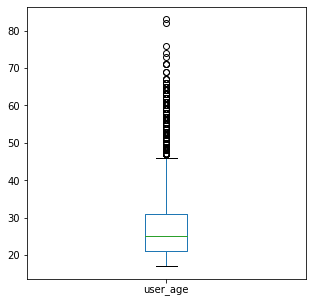

In [ ]:
df_users_clean.boxplot(column=['user_age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

It turns out that there are many outliers in the user age data. Use the IQR formula to calculate the upper and lower, and delete the data that is outside the fence.

In [ ]:
Q1 = df_users_clean['user_age'].quantile(0.25)
Q3 = df_users_clean['user_age'].quantile(0.75)

IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence)
print('Upper fence:',upper_fence)

Q1: 21.0
Q3: 31.0
IQR: 10.0
Lower fence: 6.0
Upper fence: 46.0


In [ ]:
df_users_full = len(df_users_clean)
age_outliers = len(df_users_clean[(df_users_clean['user_age']<lower_fence) | (df_users_clean['user_age']>upper_fence)])

print('The length of the data before remove outliers: ',df_users_full)
print('Number of outliers: ',age_outliers)
print('Percentage of outliers: ', round(age_outliers/df_users_full*100,2), '%')

The length of the data before remove outliers:  14712
Number of outliers:  652
Percentage of outliers:  4.43 %


A total of 4.43% of our data are outliers, since the number is small, we can just delete them.

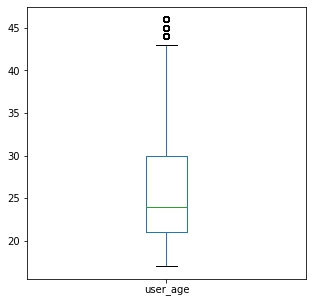

In [ ]:
df_users_clean = df_users_clean[(df_users_clean['user_age']>=lower_fence) & (df_users_clean['user_age']<=upper_fence)]
df_users_clean.boxplot(column=['user_age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

Screening again using the boxplot, it appears that the outliers have been greatly reduced.

In [ ]:
print('The length of the data before remove outliers: ',df_users_full)
print('The length of the data after remove ouliers: ',len(df_users_clean))

The length of the data before remove outliers:  14712
The length of the data after remove ouliers:  14060


> **Daily User Balance Data**

In [ ]:
df_daily_user_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_transaction_amount             158811 non-null  float64       
 3   Pasar_Uang_transaction_amount        158811 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  158811 non-null  float64       
 5   Campuran_transaction_amount          158811 non-null  float64       
 6   month                                158811 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 8.5+ MB


For daily transaction data, we need to check outliers in all transaction columns one by one. We also need to exclude values that are 0 so that they don't interfere with the IQR calculation.


In [ ]:
#Stock Transaction IQR
df_saham = df_daily_user_bal_clean[df_daily_user_bal_clean['Saham_transaction_amount'] != 0]

Q1 = df_saham['Saham_transaction_amount'].quantile(0.25)
Q3 = df_saham['Saham_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_fence_saham = Q1 - 1.5 * IQR
upper_fence_saham = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence_saham)
print('Upper fence:',upper_fence_saham)

Q1: -40000.0
Q3: 150110.0
IQR: 190110.0
Lower fence: -325165.0
Upper fence: 435275.0


In [ ]:
#Money Market Transaction IQR
df_pasar_uang = df_daily_user_bal_clean[df_daily_user_bal_clean['Pasar_Uang_transaction_amount'] != 0]

Q1 = df_pasar_uang['Pasar_Uang_transaction_amount'].quantile(0.25)
Q3 = df_pasar_uang['Pasar_Uang_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_fence_pasar_uang = Q1 - 1.5 * IQR
upper_fence_pasar_uang = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence_pasar_uang)
print('Upper fence:',upper_fence_pasar_uang)

Q1: -10000.0
Q3: 100000.0
IQR: 110000.0
Lower fence: -175000.0
Upper fence: 265000.0


In [ ]:
#Bond Transaction IQR
df_pendapatan_tetap = df_daily_user_bal_clean[df_daily_user_bal_clean['Pendapatan_Tetap_transaction_amount']!=0]

Q1 = df_pendapatan_tetap['Pendapatan_Tetap_transaction_amount'].quantile(0.25)
Q3 = df_pendapatan_tetap['Pendapatan_Tetap_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_fence_pendapatan_tetap = Q1 - 1.5 * IQR
upper_fence_pendapatan_tetap = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence_pendapatan_tetap)
print('Upper fence:',upper_fence_pendapatan_tetap)

Q1: -20000.0
Q3: 170000.0
IQR: 190000.0
Lower fence: -305000.0
Upper fence: 455000.0


In [ ]:
#Mixed Transaction IQR
df_campuran = df_daily_user_bal_clean[df_daily_user_bal_clean['Campuran_transaction_amount']!=0]

Q1 = df_campuran['Campuran_transaction_amount'].quantile(0.25)
Q3 = df_campuran['Campuran_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_fence_campuran = Q1 - 1.5 * IQR
upper_fence_campuran = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence_campuran)
print('Upper fence:',upper_fence_campuran)

Q1: -100000.0
Q3: 2000000.0
IQR: 2100000.0
Lower fence: -3250000.0
Upper fence: 5150000.0


After finding all the IQR, we keep a list of user id that have transaction data that are outliers.

In [ ]:
outliers = df_daily_user_bal_clean[
    ~df_daily_user_bal_clean['Saham_transaction_amount'].between(lower_fence_saham, upper_fence_saham) |
    ~df_daily_user_bal_clean['Pasar_Uang_transaction_amount'].between(lower_fence_pasar_uang, upper_fence_pasar_uang) |
    ~df_daily_user_bal_clean['Pendapatan_Tetap_transaction_amount'].between(lower_fence_pendapatan_tetap, upper_fence_pendapatan_tetap) |
    ~df_daily_user_bal_clean['Campuran_transaction_amount'].between(lower_fence_campuran, upper_fence_campuran)]
outliers

,user_id,date,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
25,50961,2021-09-01,1000000.0,0.0,0.0,0.0,2021-09
46,50961,2021-09-30,300000.0,600000.0,1200000.0,0.0,2021-09
99,54759,2021-09-30,0.0,2000000.0,0.0,0.0,2021-09
166,67251,2021-09-20,530000.0,100000.0,370000.0,0.0,2021-09
196,71229,2021-08-20,0.0,0.0,0.0,-4300000.0,2021-08
...,...,...,...,...,...,...,...
158161,4132281,2021-09-30,450000.0,140000.0,210000.0,0.0,2021-09
158164,4132347,2021-09-30,0.0,0.0,500000.0,0.0,2021-09
158178,4132672,2021-09-30,-100000.0,1000000.0,0.0,0.0,2021-09
158220,4134266,2021-09-30,0.0,1190000.0,0.0,0.0,2021-09


In [ ]:
outliers_user_id = outliers['user_id'].drop_duplicates().values.tolist()
len(outliers_user_id)

1316

There are 1316 users whose transaction values are counted as outliers. We can eliminate all the transactions of these users.

In [ ]:
df_daily_user_bal_clean = df_daily_user_bal_clean[~df_daily_user_bal_clean['user_id'].isin(outliers_user_id)]
df_daily_user_bal_clean

,user_id,date,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
0,50701,2021-08-30,0.0,0.0,0.0,0.0,2021-08
1,50701,2021-08-31,0.0,0.0,0.0,0.0,2021-08
2,50701,2021-09-01,0.0,0.0,0.0,0.0,2021-09
3,50701,2021-09-02,0.0,0.0,0.0,0.0,2021-09
4,50701,2021-09-03,0.0,0.0,0.0,0.0,2021-09
...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,2021-09
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,2021-09
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,2021-09
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,2021-09


We have a total of 126.452 data after removing outliers.


> **Monthly Transaction Data**

We do the same with our monthly transaction data. We remove the transactions from the user_id list that we created earlier. 

In [ ]:
df_monthly_transaction_clean = df_monthly_transaction_clean[~df_monthly_transaction_clean['user_id'].isin(outliers_user_id)]
df_monthly_transaction_clean

,user_id,month,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_frequency_stocks,MoneyMarket_AUM_end,...,total_sell_bond,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed
0,50701,2021-08,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,10206945.0,10000000.0,206945.0,0.0,0.0,0.0,0
1,50701,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,9943587.0,10000000.0,-56413.0,0.0,0.0,0.0,0
4,53759,2021-08,70839.0,70000.0,839.0,0.0,0.0,0.0,0,10006.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,53759,2021-09,73179.0,70000.0,3179.0,0.0,0.0,0.0,0,10027.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,61414,2021-08,0.0,0.0,0.0,0.0,-10000.0,-10000.0,1,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
11348,4165132,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0,10001.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
11349,4165630,2021-09,41625.0,40000.0,1625.0,0.0,0.0,0.0,0,10001.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
11350,4165704,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


We have 9,297 monthly transaction data after removing outliers.

### **Convert Data Type**

> **Users Data**

In [ ]:
df_users_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 495 to 14554
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14060 non-null  int64 
 1   user_gender         14060 non-null  object
 2   user_age            14060 non-null  int64 
 3   user_occupation     14060 non-null  object
 4   user_income_range   14060 non-null  object
 5   referral_code_used  14060 non-null  object
dtypes: int64(2), object(4)
memory usage: 768.9+ KB


The user_id data type is still an integer. We should change it to a string because we don't need to do math calculations on this column.

In [ ]:
df_users_clean['user_id'] = df_users_clean['user_id'].astype(str)
df_users_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 495 to 14554
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14060 non-null  object
 1   user_gender         14060 non-null  object
 2   user_age            14060 non-null  int64 
 3   user_occupation     14060 non-null  object
 4   user_income_range   14060 non-null  object
 5   referral_code_used  14060 non-null  object
dtypes: int64(1), object(5)
memory usage: 768.9+ KB


> **Daily User Balance Data**

In [ ]:
df_daily_user_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  int64         
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_transaction_amount             126452 non-null  float64       
 3   Pasar_Uang_transaction_amount        126452 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  126452 non-null  float64       
 5   Campuran_transaction_amount          126452 non-null  float64       
 6   month                                126452 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 7.7+ MB


The user_id data type is still an integer. We should change it to a string because we don't need to do math calculations on this column. For the month column, although it is actually a datetime data, but because the format is not intact, we can leave it as a string.

In [ ]:
df_daily_user_bal_clean['user_id'] = df_daily_user_bal_clean['user_id'].astype(str)
df_daily_user_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  object        
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_transaction_amount             126452 non-null  float64       
 3   Pasar_Uang_transaction_amount        126452 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  126452 non-null  float64       
 5   Campuran_transaction_amount          126452 non-null  float64       
 6   month                                126452 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.7+ MB



> **Monthly Transaction Data**

In [ ]:
df_monthly_transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            9297 non-null   int64  
 1   month                              9297 non-null   object 
 2   Stocks_AUM_end                     9297 non-null   float64
 3   Stocks_invested_amount_end         9297 non-null   float64
 4   Stocks_profit                      9297 non-null   float64
 5   total_buy_stocks                   9297 non-null   float64
 6   total_sell_stocks                  9297 non-null   float64
 7   total_net_stocks                   9297 non-null   float64
 8   transaction_frequency_stocks       9297 non-null   int64  
 9   MoneyMarket_AUM_end                9297 non-null   float64
 10  MoneyMarket_invested_amount_end    9297 non-null   float64
 11  MoneyMarket_profit                 9297 non-null   floa

The user_id data type is still an integer. We should change it to a string because we don't need to do math calculations on this column. For the month column, although it is actually a datetime data, but because the format is not intact, we can leave it as a string.

In [ ]:
df_monthly_transaction_clean['user_id'] = df_monthly_transaction_clean['user_id'].astype(str)
df_monthly_transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            9297 non-null   object 
 1   month                              9297 non-null   object 
 2   Stocks_AUM_end                     9297 non-null   float64
 3   Stocks_invested_amount_end         9297 non-null   float64
 4   Stocks_profit                      9297 non-null   float64
 5   total_buy_stocks                   9297 non-null   float64
 6   total_sell_stocks                  9297 non-null   float64
 7   total_net_stocks                   9297 non-null   float64
 8   transaction_frequency_stocks       9297 non-null   int64  
 9   MoneyMarket_AUM_end                9297 non-null   float64
 10  MoneyMarket_invested_amount_end    9297 non-null   float64
 11  MoneyMarket_profit                 9297 non-null   floa

### **String Manipulations**

For data efficiency, we can change the value of "used referral" to "yes". So that the contents of this column are only yes and no.

In [ ]:
df_users_clean['referral_code_used'] = df_users_clean['referral_code_used'].replace('used referral', 'yes')
df_users_clean['referral_code_used']

495       no
496       no
497      yes
498       no
499       no
        ... 
14550     no
14551     no
14552     no
14553     no
14554    yes
Name: referral_code_used, Length: 14060, dtype: object

### **Time Series Manipulation**

Make sure again that our time series data is the right type of data.

In [ ]:
df_daily_user_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  object        
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_transaction_amount             126452 non-null  float64       
 3   Pasar_Uang_transaction_amount        126452 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  126452 non-null  float64       
 5   Campuran_transaction_amount          126452 non-null  float64       
 6   month                                126452 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.7+ MB


In [ ]:
df_monthly_transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            9297 non-null   object 
 1   month                              9297 non-null   object 
 2   Stocks_AUM_end                     9297 non-null   float64
 3   Stocks_invested_amount_end         9297 non-null   float64
 4   Stocks_profit                      9297 non-null   float64
 5   total_buy_stocks                   9297 non-null   float64
 6   total_sell_stocks                  9297 non-null   float64
 7   total_net_stocks                   9297 non-null   float64
 8   transaction_frequency_stocks       9297 non-null   int64  
 9   MoneyMarket_AUM_end                9297 non-null   float64
 10  MoneyMarket_invested_amount_end    9297 non-null   float64
 11  MoneyMarket_profit                 9297 non-null   floa

All of our time series data has the right type of data.

### **Combine and Merge Datasets**

We merge our daily transaction data with user data so that we can get all the information in one whole table.

In [ ]:
df_merged_daily = pd.merge(df_users_clean, df_daily_user_bal_clean, on=['user_id'])
df_merged_daily

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09-08,0.0,0.0,0.0,0.0,2021-09
1,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09-09,0.0,0.0,0.0,0.0,2021-09
2,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09-10,0.0,0.0,0.0,0.0,2021-09
3,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09-13,0.0,0.0,0.0,0.0,2021-09
4,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09-14,0.0,0.0,0.0,0.0,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...
121655,3802513,Female,46,IRT,< 10 Juta,no,2021-09-24,0.0,0.0,0.0,0.0,2021-09
121656,3802513,Female,46,IRT,< 10 Juta,no,2021-09-27,0.0,0.0,0.0,0.0,2021-09
121657,3802513,Female,46,IRT,< 10 Juta,no,2021-09-28,0.0,0.0,0.0,0.0,2021-09
121658,3802513,Female,46,IRT,< 10 Juta,no,2021-09-29,0.0,0.0,0.0,0.0,2021-09


Do the same with the monthly transaction data.

In [ ]:
df_merged_monthly = pd.merge(df_users_clean, df_monthly_transaction_clean, on=['user_id'])
df_merged_monthly

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,month,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,...,total_sell_bond,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,194956.0,190000.0,4956.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2182692,Male,17,Pelajar,< 10 Juta,yes,2021-09,0.0,0.0,0.0,...,0.0,25000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3426536,Female,17,Pelajar,< 10 Juta,no,2021-09,51857.0,50000.0,1857.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,0.0,0.0,0.0,...,0.0,504590.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3750521,Male,17,Pelajar,< 10 Juta,no,2021-09,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,3736233,Male,46,Swasta,< 10 Juta,no,2021-09,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8934,2478889,Female,46,Swasta,< 10 Juta,no,2021-08,30486.0,30000.0,486.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8935,2478889,Female,46,Swasta,< 10 Juta,no,2021-09,31583.0,30000.0,1583.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8936,3802513,Female,46,IRT,< 10 Juta,no,2021-08,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


Now we have 2 complete data with their respective functions.
- merged_daily_transaction: used to analyze daily transactions made by users
- merged_monthly_transaction: used to analyze the user's monthly AUM, balance, profit, and total buy/sell.

## **Exploratory Data Analysis**

### **Descriptive statistics**

#### **How many users do we have in the data?**

In [ ]:
df_merged_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121660 entries, 0 to 121659
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              121660 non-null  object        
 1   user_gender                          121660 non-null  object        
 2   user_age                             121660 non-null  int64         
 3   user_occupation                      121660 non-null  object        
 4   user_income_range                    121660 non-null  object        
 5   referral_code_used                   121660 non-null  object        
 6   date                                 121660 non-null  datetime64[ns]
 7   Saham_transaction_amount             121660 non-null  float64       
 8   Pasar_Uang_transaction_amount        121660 non-null  float64       
 9   Pendapatan_Tetap_transaction_amount  121660 non-null  float64       
 

In [ ]:
distinct_user = df_merged_daily.drop_duplicates('user_id')
distinct_user['user_id'].count()

6694

We have a total of **6694** users.

#### **What is the ratio of male and female users?**




In [ ]:
df_gender = distinct_user['user_gender'].value_counts().rename_axis('gender').reset_index(name='counts')
df_gender

,gender,counts
0,Male,4277
1,Female,2417


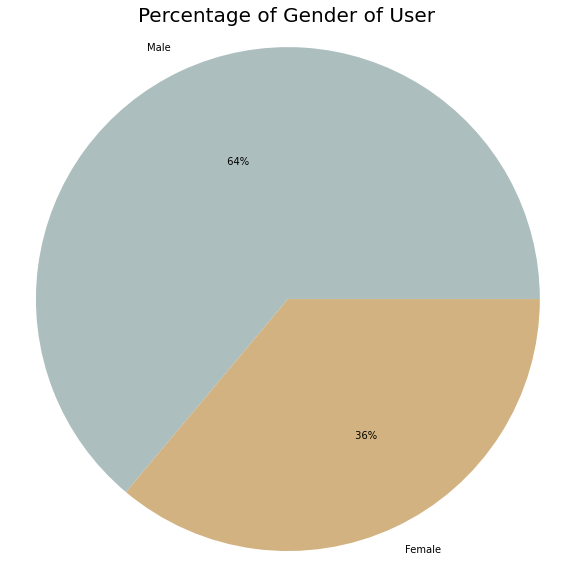

In [ ]:
plt.figure(figsize=(10, 10))

data = df_gender['counts']
labels = df_gender['gender']

plt.pie(data,labels=labels,autopct='%11.f%%',colors=('#ACBEBE','#D2B280'))
plt.title('Percentage of Gender of User', fontsize=20)
plt.axis('equal')
plt.show()


Most of our users are male with a total of **64%** of our users.

#### **How is the distribution of age of user?**

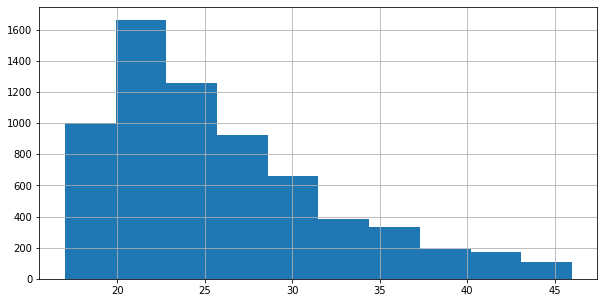

In [ ]:
distinct_user['user_age'].hist(figsize=(10,5))

The majority of our users are in the **20-25** age range.

#### **What occupation do most of our users have?**

In [ ]:
df_occupation = distinct_user['user_occupation'].value_counts().rename_axis('occupation').reset_index(name='counts')
df_occupation


,occupation,counts
0,Pelajar,3815
1,Swasta,1381
2,Others,916
3,IRT,335
4,Pengusaha,247


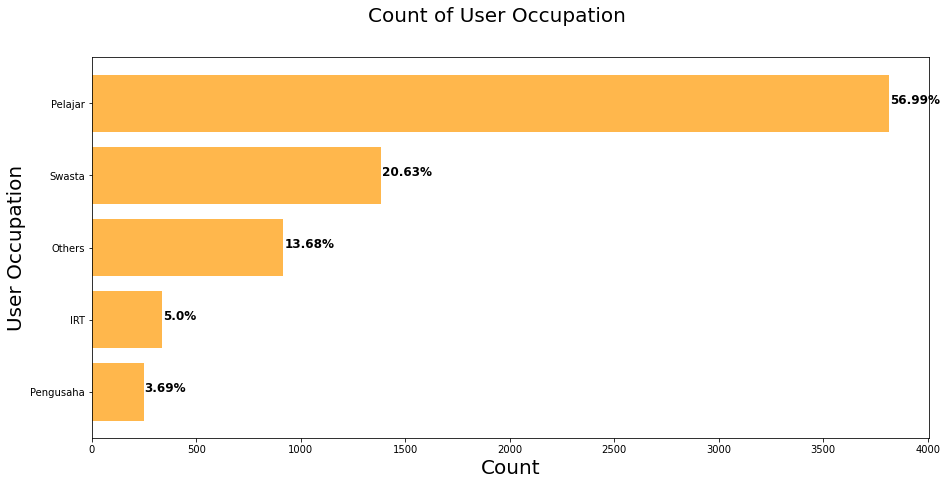

In [ ]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Count of User Occupation', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('User Occupation', fontsize=20)

total_data = distinct_user['user_id'].count()

df_occupation.sort_values('counts', ascending=True, inplace=True)
x = df_occupation['occupation']
y = df_occupation['counts']

for i, v in enumerate(y):
    plt.text(v + 5, i, str(round(v/total_data*100,2)) + '%', fontweight='bold', fontsize=12)

plt.barh(x, y, color=('#FFB74C'))
plt.show()

Explaining from our previous findings that most of our users are in the age of 20-25, most of them are students. By paying attention to the pareto principle, we can focus on campaigns aimed at 80% of our users, **students and private workers**.

#### **What income range do most of our users have?**


In [ ]:
df_income_range = distinct_user['user_income_range'].value_counts().rename_axis('income_range').reset_index(name='counts')
df_income_range

,income_range,counts
0,< 10 Juta,3146
1,Rp 10 Juta - 50 Juta,2224
2,> Rp 50 Juta - 100 Juta,961
3,> Rp 100 Juta,363


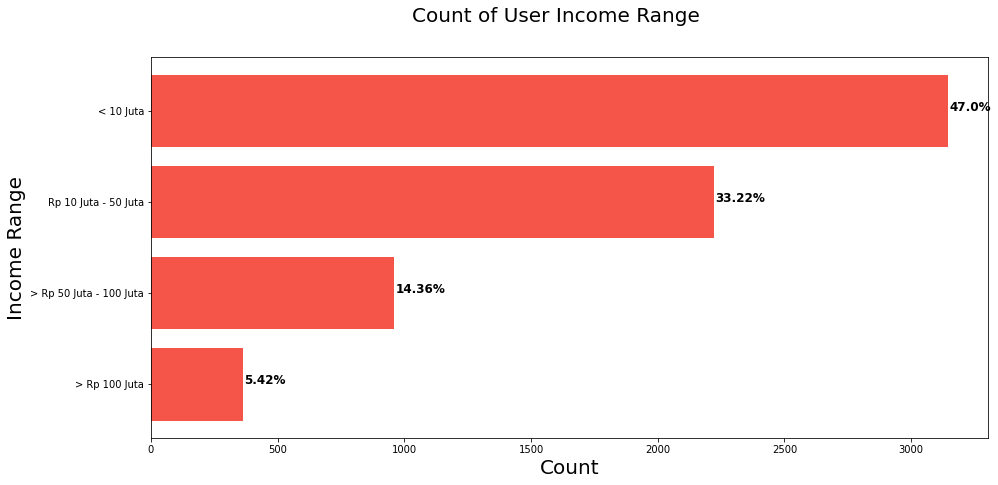

In [ ]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Count of User Income Range', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Income Range', fontsize=20)

total_data = distinct_user['user_id'].count()

df_income_range.sort_values('counts', ascending=True, inplace=True)
x = df_income_range['income_range']
y = df_income_range['counts']

for i, v in enumerate(y):
    plt.text(v + 5, i, str(round(v/total_data*100,2)) + '%', fontweight='bold', fontsize=12)

plt.barh(x, y, color=('#F55449'))
plt.show()

From this we can see that mutual fund products are in **great demand** by people who have an **income below 50 million**.

#### **What is the ratio of users using the referral code?**

In [ ]:
df_referral = distinct_user['referral_code_used'].value_counts().rename_axis('referral').reset_index(name='counts')
df_referral

,referral,counts
0,no,4215
1,yes,2479


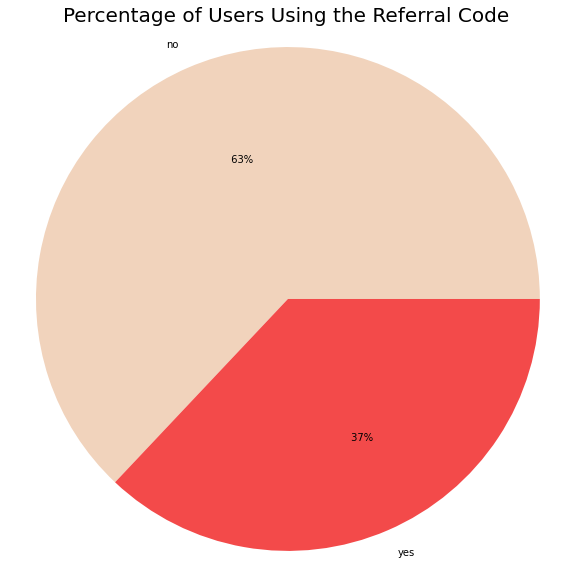

In [ ]:
plt.figure(figsize=(10, 10))

data = df_referral['counts']
labels = df_referral['referral']

plt.pie(data,labels=labels,autopct='%11.f%%',colors=('#F1D3BC','#F34A4A'))
plt.title('Percentage of Users Using the Referral Code', fontsize=20)
plt.axis('equal')
plt.show()

Most of our users don't use referral codes when signing up to our platform. This means we don't need to burn our budget on referral code promotion.

#### **What is the average AUM per user?**

Use the describe() function to see the statistical description.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_describe = df_merged_monthly.replace(0, np.nan).describe()
df_describe

,user_age,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_frequency_stocks,MoneyMarket_AUM_end,MoneyMarket_invested_amount_end,...,total_sell_bond,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed
count,8938.00,4387.00,4356.00,4387.00,1293.00,1173.00,2135.00,2189.00,5359.00,5359.00,...,1041.00,2227.00,2270.00,175.00,175.00,175.00,30.00,19.00,44.00,44.00
mean,25.64,274231.79,268513.31,7615.89,114965.39,-73886.12,29031.30,1.38,242720.62,242253.88,...,-67379.23,33716.47,1.41,4591176.38,4748188.06,-157011.69,973566.67,-864550.74,290466.73,1.23
std,6.56,1702161.33,1662782.99,53945.73,119511.59,66614.15,131818.00,0.78,2788898.01,2786362.10,...,60838.83,124091.92,0.82,9731977.03,10143321.56,499275.98,955362.13,792761.16,1094773.75,0.57
min,17.00,117.00,114.00,-116508.00,114.00,-440000.00,-400000.00,1.00,9996.00,10000.00,...,-500000.00,-500000.00,1.00,50005.00,50000.00,-3634241.00,50000.00,-3000000.00,-3000000.00,1.00
25%,21.00,41848.00,40000.00,821.50,40000.00,-100000.00,-50000.00,1.00,10019.00,10000.00,...,-80000.00,-40000.00,1.00,787052.50,825000.00,-71597.00,225000.00,-1000000.00,-275000.00,1.00
50%,24.00,63908.00,70000.00,1931.00,90000.00,-50000.00,10000.00,1.00,30023.00,30000.00,...,-50000.00,25000.00,1.00,1071220.00,1100000.00,-19917.00,1000000.00,-1000000.00,150000.00,1.00
75%,29.00,176104.00,180000.00,4571.00,150000.00,-40000.00,90000.00,2.00,100306.00,100000.00,...,-30000.00,70000.00,2.00,3383192.00,3500000.00,9.00,1075000.00,-200000.00,1000000.00,1.00
max,46.00,51375155.00,50000000.00,1767436.00,1000000.00,-10000.00,1000000.00,7.00,150067007.00,150000000.00,...,-5000.00,1420000.00,9.00,50099642.00,50000000.00,206945.00,4500000.00,-100000.00,2500000.00,4.00


Transpose the statistical descriptive data to facilitate visualization.

In [ ]:
df_describe = df_describe.T.reset_index()
df_describe

,index,count,mean,std,min,25%,50%,75%,max
0,user_age,8938.00,25.64,6.56,17.00,21.00,24.00,29.00,46.00
1,Stocks_AUM_end,4387.00,274231.79,1702161.33,117.00,41848.00,63908.00,176104.00,51375155.00
2,Stocks_invested_amount_end,4356.00,268513.31,1662782.99,114.00,40000.00,70000.00,180000.00,50000000.00
3,Stocks_profit,4387.00,7615.89,53945.73,-116508.00,821.50,1931.00,4571.00,1767436.00
4,total_buy_stocks,1293.00,114965.39,119511.59,114.00,40000.00,90000.00,150000.00,1000000.00
5,total_sell_stocks,1173.00,-73886.12,66614.15,-440000.00,-100000.00,-50000.00,-40000.00,-10000.00
6,total_net_stocks,2135.00,29031.30,131818.00,-400000.00,-50000.00,10000.00,90000.00,1000000.00
7,transaction_frequency_stocks,2189.00,1.38,0.78,1.00,1.00,1.00,2.00,7.00
8,MoneyMarket_AUM_end,5359.00,242720.62,2788898.01,9996.00,10019.00,30023.00,100306.00,150067007.00
9,MoneyMarket_invested_amount_end,5359.00,242253.88,2786362.10,10000.00,10000.00,30000.00,100000.00,150000000.00


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


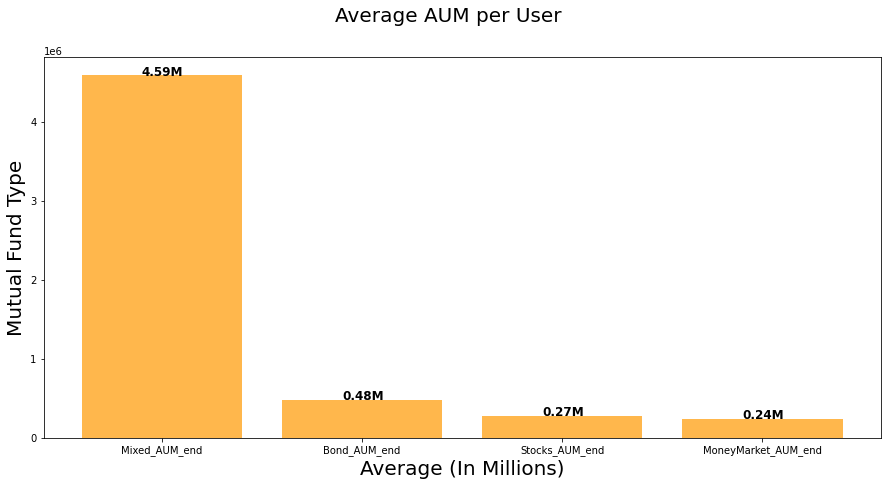

In [ ]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Average AUM per User', fontsize=20)
plt.xlabel('Average (In Millions)', fontsize=20)
plt.ylabel('Mutual Fund Type', fontsize=20)

df_AUM = df_describe[df_describe['index'].str.contains('AUM', na=False)]

df_AUM.sort_values('mean', ascending=False, inplace=True)
x = df_AUM['index']
y = df_AUM['mean']

for i, v in enumerate(y):
    vmil = round(v/1000000,2)
    plt.text(i - 0.1, v, str(vmil)+'M', fontweight='bold', fontsize=12)

plt.bar(x, y, color=('#FFB74C'))
plt.show()

Our users mostly dare to invest large amounts in **mixed mutual funds**. The average AUM is much higher than the other types.

#### **What is the average monthly buy/sell per customer?**


In [ ]:
df_monthly_average = df_merged_monthly.replace(0, np.nan).groupby("month").mean()
df_monthly_average

,user_age,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_frequency_stocks,MoneyMarket_AUM_end,MoneyMarket_invested_amount_end,...,total_sell_bond,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed
month,,,,,,,,,,,,,,,,,,,,,
2021-08,25.47,218837.76,216511.62,2326.13,96990.52,-76530.50,-1646.83,1.28,128061.34,127857.01,...,-66849.54,13937.00,1.30,6053238.95,6213096.28,-159857.33,1211111.11,-1036641.40,439753.31,1.23
2021-09,25.70,294097.48,287343.18,9512.93,119020.38,-72927.89,37976.77,1.41,286223.26,285656.96,...,-67551.08,40078.77,1.45,3866393.22,4021994.25,-155601.03,871761.90,-803089.79,227862.68,1.23


In [ ]:
df_monthly_average = df_monthly_average.T.reset_index()
df_monthly_average

month,index,2021-08,2021-09
0,user_age,25.47,25.70
1,Stocks_AUM_end,218837.76,294097.48
2,Stocks_invested_amount_end,216511.62,287343.18
3,Stocks_profit,2326.13,9512.93
4,total_buy_stocks,96990.52,119020.38
5,total_sell_stocks,-76530.50,-72927.89
6,total_net_stocks,-1646.83,37976.77
7,transaction_frequency_stocks,1.28,1.41
8,MoneyMarket_AUM_end,128061.34,286223.26
9,MoneyMarket_invested_amount_end,127857.01,285656.96


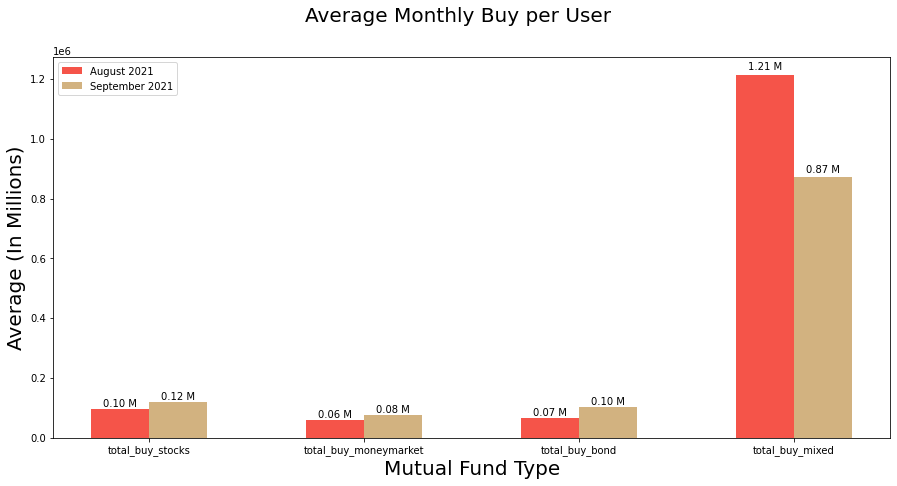

In [ ]:
df_buy = df_monthly_average[df_monthly_average['index'].str.contains('buy', na=False)]


N = len(df_buy['index'])
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

yvals = df_buy['2021-08']
rects1 = ax.bar(ind-0.5*width, yvals, width, color='#F55449')
zvals = df_buy['2021-09']
rects2 = ax.bar(ind+0.5*width, zvals, width, color='#D2B280')

fig.suptitle('Average Monthly Buy per User', fontsize=20)
ax.set_xlabel('Mutual Fund Type', fontsize=20)
ax.set_ylabel('Average (In Millions)', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( df_buy['index'] )
ax.legend( (rects1[0], rects2[0]), ('August 2021', 'September 2021') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%.2f M'%float(h/1000000),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Overall, the average buy of mixed mutual funds is also much higher than the others. However, it can be seen that in September, the number of mixed buys decreased from the previous month. Whereas for other types of mutual funds have increased.

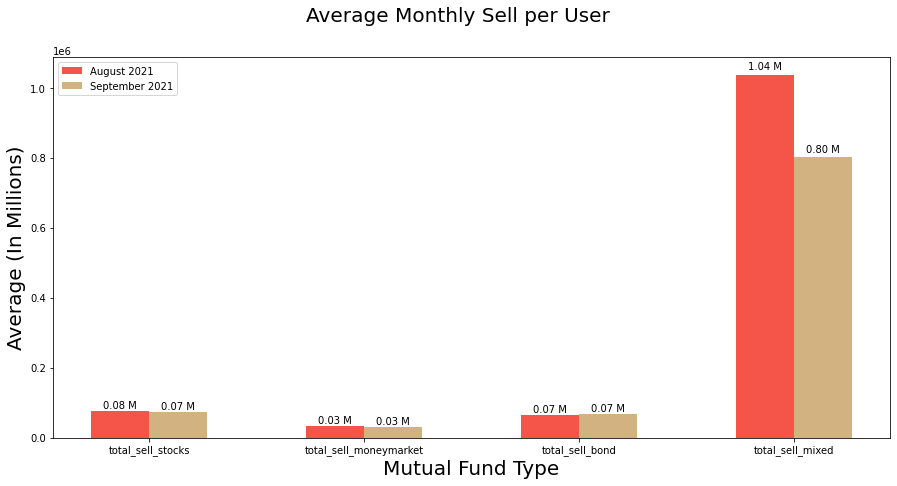

In [ ]:
df_sell = df_monthly_average[df_monthly_average['index'].str.contains('sell', na=False)]


N = len(df_sell['index'])
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

yvals = df_sell['2021-08'].abs()
rects1 = ax.bar(ind-0.5*width, yvals, width, color='#F55449')
zvals = df_sell['2021-09'].abs()
rects2 = ax.bar(ind+0.5*width, zvals, width, color='#D2B280')

fig.suptitle('Average Monthly Sell per User', fontsize=20)
ax.set_xlabel('Mutual Fund Type', fontsize=20)
ax.set_ylabel('Average (In Millions)', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( df_sell['index'] )
ax.legend( (rects1[0], rects2[0]), ('August 2021', 'September 2021') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%.2f M'%float(h/1000000),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Just like buy transactions, it can be seen that in September the number of sells from mixed types has decreased from the previous month. Whereas for other types of mutual funds it looks stagnant.

#### **What is the average current profit per user?**

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


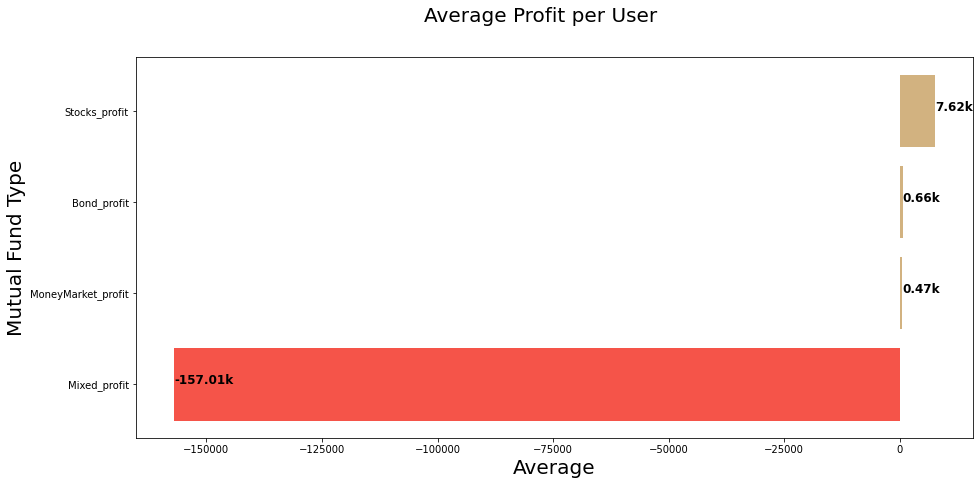

In [ ]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Average Profit per User', fontsize=20)
plt.xlabel('Average', fontsize=20)
plt.ylabel('Mutual Fund Type', fontsize=20)

df_AUM = df_describe[df_describe['index'].str.contains('profit', na=False)]

df_AUM.sort_values('mean', ascending=True, inplace=True)
x = df_AUM['index']
y = df_AUM['mean']

for i, v in enumerate(y):
    vmil = round(v/1000,2)
    plt.text(v + 5, i, str(vmil)+'k', fontweight='bold', fontsize=12)

colors = []
for value in df_AUM['mean']:
    if value < 0:
        colors.append('#F55449')
    else:
        colors.append('#D2B280')

plt.barh(x, y, color=colors)
plt.show()

It turns out that the average profit earned from mixed mutual funds is negative, in other words, a loss. This is one of the reasons for the reduced number of daily transactions in mixed mutual funds. Meanwhile, the type of mutual fund that gets the highest profit is stocks mutual fund.

### **Identify key trends in the dataset**

#### **Is there any consistent “low season” and “high season”?**

Create a time series of data containing count of daily transactions.

In [ ]:
df_count_transaction = df_merged_daily.replace(0, np.nan).groupby("date").count()
df_count_transaction

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
date,,,,,,,,,,,
2021-08-04,75,75,75,75,75,75,0,0,0,0,75
2021-08-05,133,133,133,133,133,133,2,4,2,0,133
2021-08-06,218,218,218,218,218,218,9,14,13,0,218
2021-08-09,293,293,293,293,293,293,15,16,16,0,293
2021-08-10,412,412,412,412,412,412,20,22,21,0,412
2021-08-11,708,708,708,708,708,708,31,34,32,1,708
2021-08-12,708,708,708,708,708,708,13,13,9,0,708
2021-08-13,797,797,797,797,797,797,23,37,27,0,797
2021-08-16,968,968,968,968,968,968,32,55,57,3,968


Transform column names into values to make it easier to create lineplots.

In [ ]:
dfm = df_count_transaction.reset_index()
dfm = dfm[['date','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']]
dfm = dfm.melt('date', var_name='cols', value_name='vals')
dfm


,date,cols,vals
0,2021-08-04,Saham_transaction_amount,0
1,2021-08-05,Saham_transaction_amount,2
2,2021-08-06,Saham_transaction_amount,9
3,2021-08-09,Saham_transaction_amount,15
4,2021-08-10,Saham_transaction_amount,20
...,...,...,...
163,2021-09-24,Campuran_transaction_amount,2
164,2021-09-27,Campuran_transaction_amount,2
165,2021-09-28,Campuran_transaction_amount,0
166,2021-09-29,Campuran_transaction_amount,2


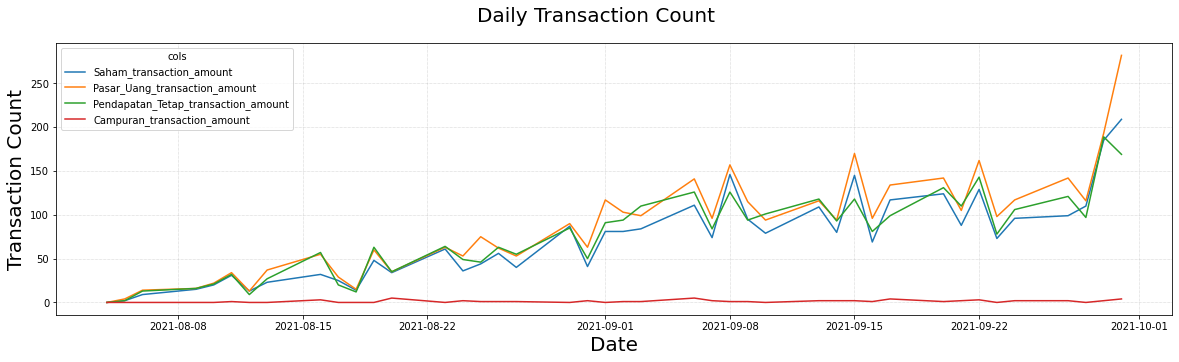

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily Transaction Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=dfm, x="date", y="vals", hue="cols")
plt.show()

The count of daily transactions seems fluctuates. However, our users tend to make transactions (buy/sell) at the beginning of each week (Monday). And rarely make transactions on weekends. It's natural to expect zero transaction on weekends because no transaction cannot be made as the market is closed.
The number of daily transactions in mixed mutual funds is very small compared to other types, we need to separate the mixed mutual funds plot to make it clearer.

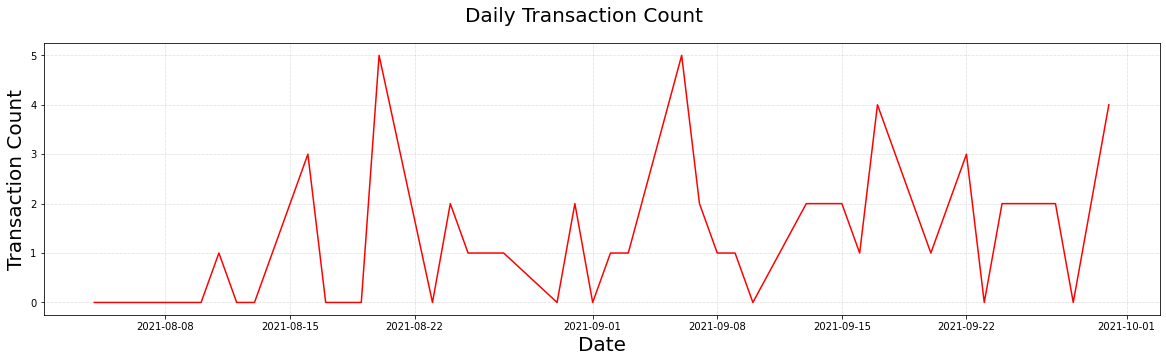

In [ ]:
dfm = df_count_transaction.reset_index()
dfm = dfm[['date','Campuran_transaction_amount']]
dfm = dfm.melt('date', var_name='cols', value_name='vals')

fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily Transaction Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=dfm, x="date", y="vals", color="red")
plt.show()

It can be seen that there is no particular pattern in the transactions of mixed mutual funds.

#### **How about trends over time? Is it increasing? Decreasing? Stay the same?**

In [ ]:
df_trend = df_count_transaction.reset_index()

fig = px.scatter(
        df_trend, 
        x="date",
        y="Saham_transaction_amount",
        color_discrete_sequence=['blue'],
        trendline="ols",
        labels={
            "date": "Date",
            "Saham_transaction_amount": "Transaction Count"
        },
        title="Daily Count of Stock Transaction Trendline"
    )
fig.show()

Although the count of Stocks transactions fluctuates, the trendline of stock transactions is rising, with $R^2$ of 74.93%

In [ ]:
df_trend = df_count_transaction.reset_index()

fig = px.scatter(
        df_trend, 
        x="date",
        y="Pasar_Uang_transaction_amount",
        color_discrete_sequence=['orange'],
        trendline="ols",
        labels={
            "date": "Date",
            "Pasar_Uang_transaction_amount": "Transaction Count"
        },
        title="Daily Count of Money Market Transaction Trendline"
    )
fig.show()

Although the count of Money Market transactions fluctuates, the trendline of stock transactions is rising, with $R^2$ of 75.37%

In [ ]:
df_trend = df_count_transaction.reset_index()

fig = px.scatter(
        df_trend, 
        x="date",
        y="Pendapatan_Tetap_transaction_amount",
        color_discrete_sequence=['green'],
        trendline="ols",
        labels={
            "date": "Date",
            "Pendapatan_Tetap_transaction_amount": "Transaction Count"
        },
        title="Daily Count of Bond Transaction Trendline"
    )
fig.show()

Although the count of Bond transactions fluctuates, the trendline of stock transactions is rising, with  𝑅2  of 79.67%

In [ ]:
df_trend = df_count_transaction.reset_index()

fig = px.scatter(
        df_trend, 
        x="date",
        y="Campuran_transaction_amount",
        color_discrete_sequence=['red'],
        trendline="ols",
        labels={
            "date": "Date",
            "Campuran_transaction_amount": "Transaction Count"
        },
        title="Daily Count of Mixed Transaction Trendline"
    )
fig.show()

Although the trendline of the mixed transaction is increasing, the $R^2$ is very small (16.51%). So we can't conclude that the trend is really increasing.

# **MILESTONE 2**

---

**Data Encoding**

*To* do clustering, we can focus our analysis on the data for the last 1 month, which is in September.

In [ ]:
df_sept = df_merged_monthly[df_merged_monthly['month'] == '2021-09']
df_clustering = df_sept.copy()
df_clustering

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,month,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,...,total_sell_bond,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,194956.00,190000.00,4956.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
1,2182692,Male,17,Pelajar,< 10 Juta,yes,2021-09,0.00,0.00,0.00,...,0.00,25000.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0
2,3426536,Female,17,Pelajar,< 10 Juta,no,2021-09,51857.00,50000.00,1857.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,504590.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0
4,3750521,Male,17,Pelajar,< 10 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,3990544,Female,46,Swasta,> Rp 100 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8931,3791358,Female,46,IRT,> Rp 100 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0.00,0,9273152.00,10000000.00,-726848.00,0.00,0.00,0.00,0
8933,3736233,Male,46,Swasta,< 10 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8935,2478889,Female,46,Swasta,< 10 Juta,no,2021-09,31583.00,30000.00,1583.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 0 to 8937
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            6694 non-null   object 
 1   user_gender                        6694 non-null   object 
 2   user_age                           6694 non-null   int64  
 3   user_occupation                    6694 non-null   object 
 4   user_income_range                  6694 non-null   object 
 5   referral_code_used                 6694 non-null   object 
 6   month                              6694 non-null   object 
 7   Stocks_AUM_end                     6694 non-null   float64
 8   Stocks_invested_amount_end         6694 non-null   float64
 9   Stocks_profit                      6694 non-null   float64
 10  total_buy_stocks                   6694 non-null   float64
 11  total_sell_stocks                  6694 non-null   float

We will do clustering based on the socio-economic backgrounds of the users. From these various conditions, we look at the amount of investment and the number of transactions. So we only need to store relevant variables.

In [ ]:
df_clustering = df_clustering[['user_id','user_gender','user_age','user_occupation','user_income_range','referral_code_used',
                              'Stocks_invested_amount_end','transaction_frequency_stocks','MoneyMarket_invested_amount_end','transaction_frequency_moneymarket','Bond_invested_amount_end','transaction_frequency_bond','Mixed_invested_amount_end','transaction_frequency_mixed']]
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 0 to 8937
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            6694 non-null   object 
 1   user_gender                        6694 non-null   object 
 2   user_age                           6694 non-null   int64  
 3   user_occupation                    6694 non-null   object 
 4   user_income_range                  6694 non-null   object 
 5   referral_code_used                 6694 non-null   object 
 6   Stocks_invested_amount_end         6694 non-null   float64
 7   transaction_frequency_stocks       6694 non-null   int64  
 8   MoneyMarket_invested_amount_end    6694 non-null   float64
 9   transaction_frequency_moneymarket  6694 non-null   int64  
 10  Bond_invested_amount_end           6694 non-null   float64
 11  transaction_frequency_bond         6694 non-null   int64

**Gender and Referral Code Labelling**

Clustering modeling cannot use string data types, so we need to encode categorical variables. Untuk yang kategorinya hanya ada 2 tipe, kita beri label dengan 0 dan 1. <br>
<br>
Gender:<br>
Female = 0<br>
Male = 1<br>
<br>
Referral Code:<br>
no = 0<br>
yes = 1

In [ ]:
le = LabelEncoder()

for cat_var in ['user_gender', 'referral_code_used']:
    df_clustering[cat_var] = le.fit_transform(df_clustering[cat_var])  
df_clustering

<ipython-input-91-750581ff7ba0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Stocks_invested_amount_end,transaction_frequency_stocks,MoneyMarket_invested_amount_end,transaction_frequency_moneymarket,Bond_invested_amount_end,transaction_frequency_bond,Mixed_invested_amount_end,transaction_frequency_mixed
0,2431071,0,17,Pelajar,Rp 10 Juta - 50 Juta,0,190000.00,0,40000.00,0,270000.00,0,0.00,0
1,2182692,1,17,Pelajar,< 10 Juta,1,0.00,0,140000.00,0,75000.00,1,0.00,0
2,3426536,0,17,Pelajar,< 10 Juta,0,50000.00,0,10000.00,0,40000.00,0,0.00,0
3,336770,1,17,Pelajar,Rp 10 Juta - 50 Juta,0,0.00,0,0.00,0,604590.00,2,0.00,0
4,3750521,1,17,Pelajar,< 10 Juta,0,0.00,0,10000.00,0,0.00,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,3990544,0,46,Swasta,> Rp 100 Juta,0,0.00,0,0.00,0,300000.00,0,0.00,0
8931,3791358,0,46,IRT,> Rp 100 Juta,0,0.00,0,0.00,0,0.00,0,10000000.00,0
8933,3736233,1,46,Swasta,< 10 Juta,0,0.00,0,200000.00,0,0.00,0,0.00,0
8935,2478889,0,46,Swasta,< 10 Juta,0,30000.00,0,0.00,0,70000.00,0,0.00,0


### **Age and Income Range Labelling**

We can also label the generation by looking at the age of the user. We can break it down into 3 generations, "Gen-X", "Gen-Y", and "Gen-Z". Then, because the income range is ordinal, we can label it with an ordinal number according to the amount of the range.

In [ ]:
df_clustering.loc[df_clustering['user_age'] > 40, 'user_generation'] = 'Gen-X'
df_clustering.loc[df_clustering['user_age'].between(25,40), 'user_generation'] = 'Gen-Y'
df_clustering.loc[df_clustering['user_age'] <= 24, 'user_generation'] = 'Gen-Z'

df_clustering.loc[df_clustering['user_income_range'] == '< 10 Juta', 'user_income_range'] = 0
df_clustering.loc[df_clustering['user_income_range'] == 'Rp 10 Juta - 50 Juta', 'user_income_range'] = 1
df_clustering.loc[df_clustering['user_income_range'] == '> Rp 50 Juta - 100 Juta', 'user_income_range'] = 2
df_clustering.loc[df_clustering['user_income_range'] == '> Rp 100 Juta', 'user_income_range'] = 3

df_clustering.drop(['user_age'],axis=1,inplace=True)

df_clustering

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,user_id,user_gender,user_occupation,user_income_range,referral_code_used,Stocks_invested_amount_end,transaction_frequency_stocks,MoneyMarket_invested_amount_end,transaction_frequency_moneymarket,Bond_invested_amount_end,transaction_frequency_bond,Mixed_invested_amount_end,transaction_frequency_mixed,user_generation
0,2431071,0,Pelajar,1,0,190000.00,0,40000.00,0,270000.00,0,0.00,0,Gen-Z
1,2182692,1,Pelajar,0,1,0.00,0,140000.00,0,75000.00,1,0.00,0,Gen-Z
2,3426536,0,Pelajar,0,0,50000.00,0,10000.00,0,40000.00,0,0.00,0,Gen-Z
3,336770,1,Pelajar,1,0,0.00,0,0.00,0,604590.00,2,0.00,0,Gen-Z
4,3750521,1,Pelajar,0,0,0.00,0,10000.00,0,0.00,0,0.00,0,Gen-Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,3990544,0,Swasta,3,0,0.00,0,0.00,0,300000.00,0,0.00,0,Gen-X
8931,3791358,0,IRT,3,0,0.00,0,0.00,0,0.00,0,10000000.00,0,Gen-X
8933,3736233,1,Swasta,0,0,0.00,0,200000.00,0,0.00,0,0.00,0,Gen-X
8935,2478889,0,Swasta,0,0,30000.00,0,0.00,0,70000.00,0,0.00,0,Gen-X


### **Generation and Occupation Encoding**

For variables that have many categories, we can do One Hot Encoding.

In [ ]:
df_clustering = pd.get_dummies(df_clustering, columns=['user_generation','user_occupation'])
df_clustering

,user_id,user_gender,user_income_range,referral_code_used,Stocks_invested_amount_end,transaction_frequency_stocks,MoneyMarket_invested_amount_end,transaction_frequency_moneymarket,Bond_invested_amount_end,transaction_frequency_bond,Mixed_invested_amount_end,transaction_frequency_mixed,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
0,2431071,0,1,0,190000.00,0,40000.00,0,270000.00,0,0.00,0,0,0,1,0,0,1,0,0
1,2182692,1,0,1,0.00,0,140000.00,0,75000.00,1,0.00,0,0,0,1,0,0,1,0,0
2,3426536,0,0,0,50000.00,0,10000.00,0,40000.00,0,0.00,0,0,0,1,0,0,1,0,0
3,336770,1,1,0,0.00,0,0.00,0,604590.00,2,0.00,0,0,0,1,0,0,1,0,0
4,3750521,1,0,0,0.00,0,10000.00,0,0.00,0,0.00,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,3990544,0,3,0,0.00,0,0.00,0,300000.00,0,0.00,0,1,0,0,0,0,0,0,1
8931,3791358,0,3,0,0.00,0,0.00,0,0.00,0,10000000.00,0,1,0,0,1,0,0,0,0
8933,3736233,1,0,0,0.00,0,200000.00,0,0.00,0,0.00,0,1,0,0,0,0,0,0,1
8935,2478889,0,0,0,30000.00,0,0.00,0,70000.00,0,0.00,0,1,0,0,0,0,0,0,1


## **User Segmentation**

### **Standardize**

Standardize our data using min max scaler so that all values have the same range so that it can increase the performance of our clustering model.

In [ ]:
scaler = MinMaxScaler()
std_data = df_clustering.set_index('user_id')
std_data[:] = scaler.fit_transform(std_data[:])
std_data

,user_gender,user_income_range,referral_code_used,Stocks_invested_amount_end,transaction_frequency_stocks,MoneyMarket_invested_amount_end,transaction_frequency_moneymarket,Bond_invested_amount_end,transaction_frequency_bond,Mixed_invested_amount_end,transaction_frequency_mixed,user_generation_Gen-X,user_generation_Gen-Y,user_generation_Gen-Z,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
user_id,,,,,,,,,,,,,,,,,,,
2431071,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
2182692,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3426536,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
336770,1.00,0.33,0.00,0.00,0.00,0.00,0.00,0.01,0.22,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3750521,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990544,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3791358,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3736233,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


### **Determine Cluster Number**

There are 2 kinds of clustering techniques, RFM and K-Means Clustering. RFM can be used to segment based on recency, frequency, and monetary. So since we want to segment based on socio-economic background, it would be more appropriate to use **K-Means**. By using K-Means we can use as many variables as we need.

In using K-Means, there are 2 ways to determine the number of clusters, Elbow Method and Silhouette Analysis. We will use silhouette analysis because the output is easier to see. Comparing the silhouette score is much easier than finding the right elbow angle.

For n_clusters = 2 The average silhouette_score is : 0.3507538797423439
For n_clusters = 3 The average silhouette_score is : 0.3460217747512947
For n_clusters = 4 The average silhouette_score is : 0.30765345260117255
For n_clusters = 5 The average silhouette_score is : 0.34362765169586434
For n_clusters = 6 The average silhouette_score is : 0.38207346507264883
For n_clusters = 7 The average silhouette_score is : 0.39861498783366395
For n_clusters = 8 The average silhouette_score is : 0.44215042942786875
For n_clusters = 9 The average silhouette_score is : 0.4406559281580883
For n_clusters = 10 The average silhouette_score is : 0.4590130587617646


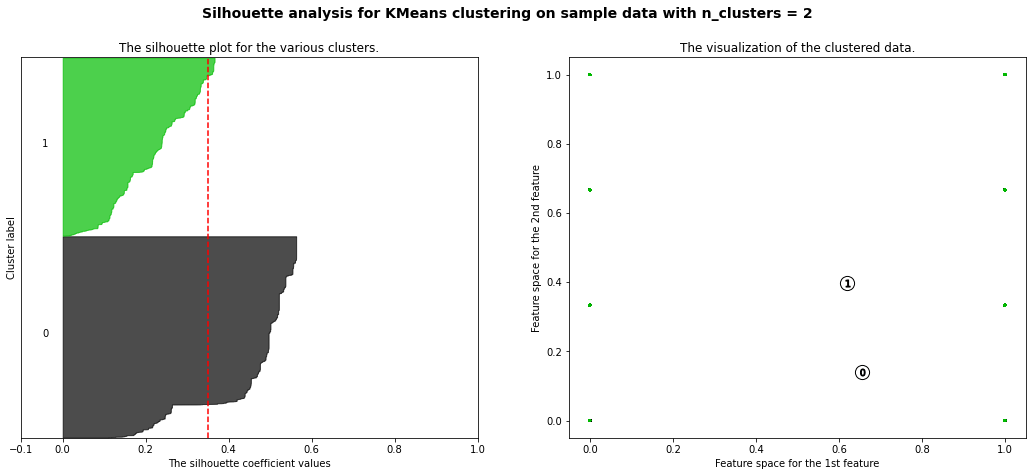

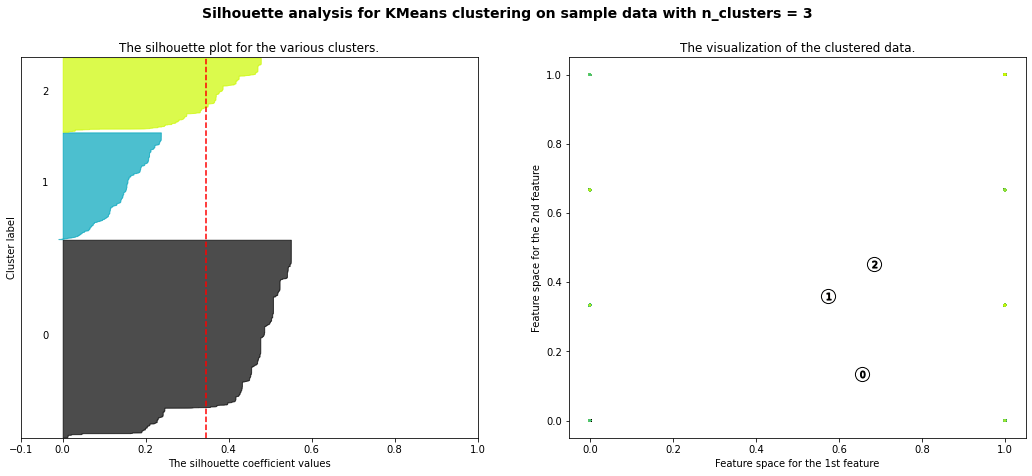

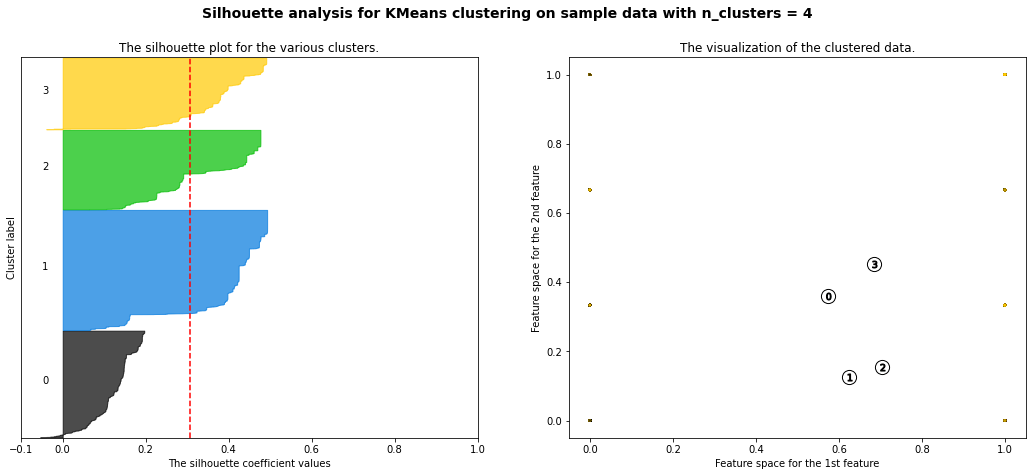

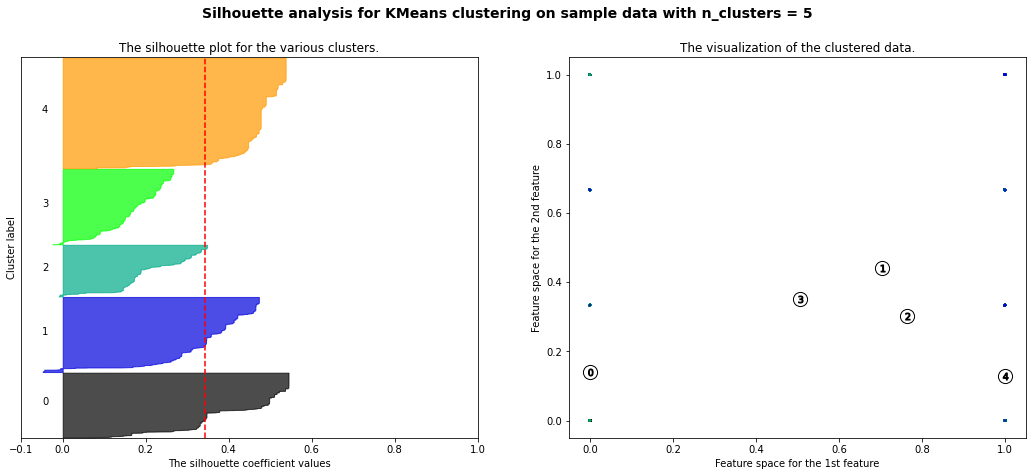

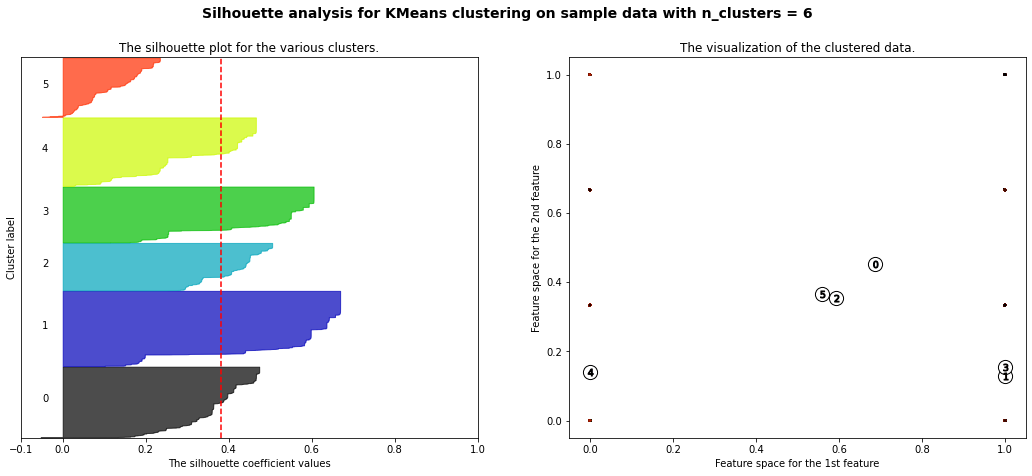

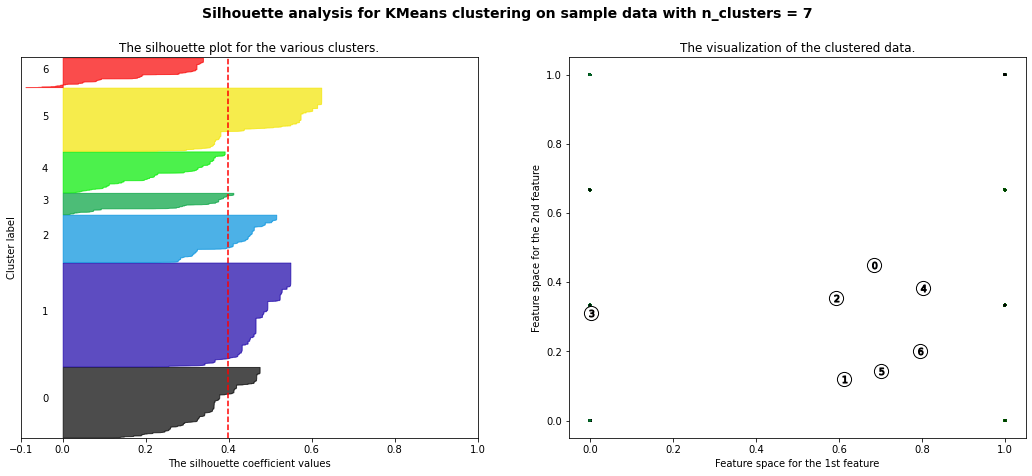

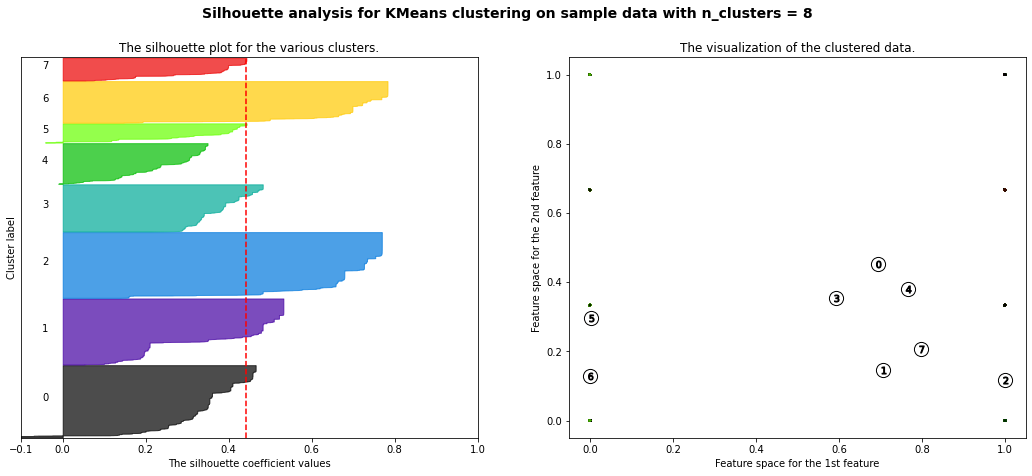

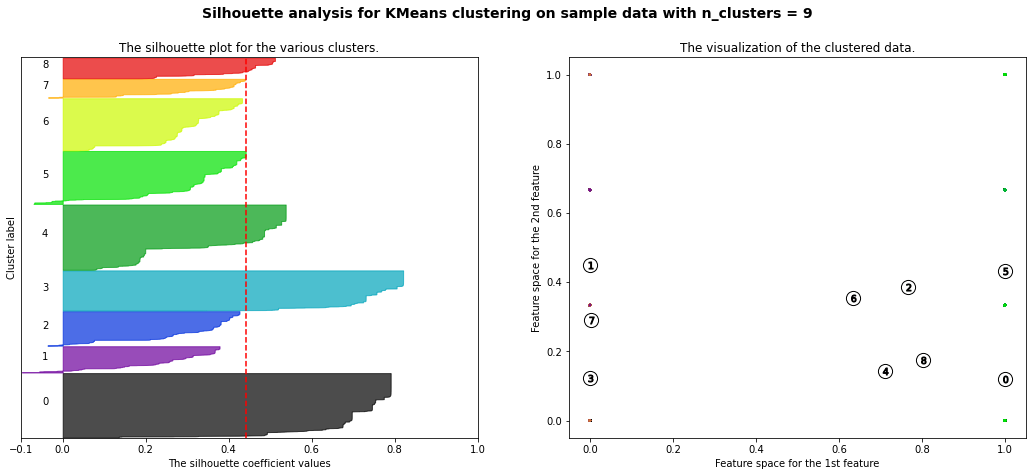

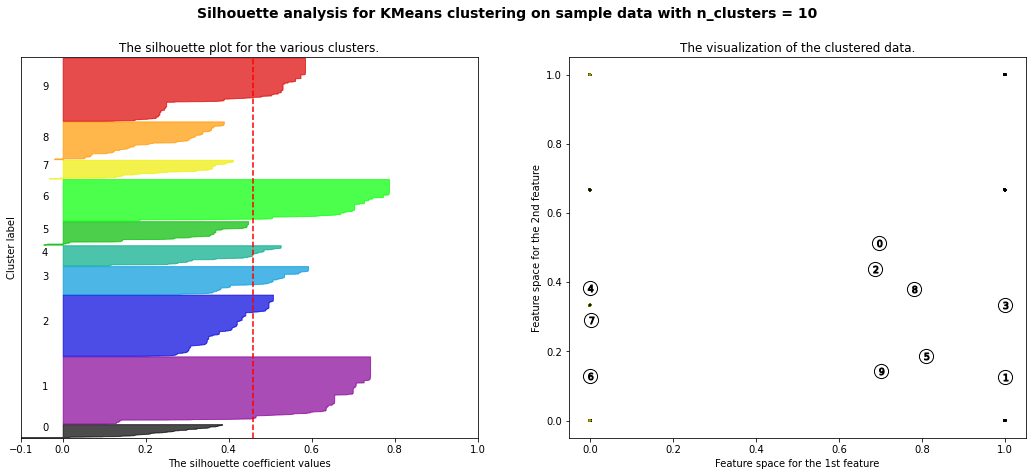

In [ ]:
silhoutte_analysis(std_data,list(range(2,11)))

By looking at the silhouette score, it can be seen that the larger the number of clusters, the better the silhouette score. However, the more the number of clusters, the worse it is for our campaign. So we can take the number of clusters that has the largest turning point score, which is **5**.

### **Implement Clustering**

In [ ]:
cluster_model = cluster.KMeans(n_clusters=5)
cluster_model.fit(std_data)
cluster_label = cluster_model.labels_
std_data['cluster'] = cluster_label
df_result = std_data.reset_index()[['user_id','cluster']]
df_result

,user_id,cluster
0,2431071,0
1,2182692,4
2,3426536,0
3,336770,4
4,3750521,4
...,...,...
6689,3990544,3
6690,3791358,2
6691,3736233,3
6692,2478889,3


Merge the cluster labels we get into our original data before encoding.

In [ ]:
df_result = pd.merge(df_sept, df_result, on=['user_id'])
df_result

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,month,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,...,total_net_bond,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed,cluster
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,194956.00,190000.00,4956.00,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
1,2182692,Male,17,Pelajar,< 10 Juta,yes,2021-09,0.00,0.00,0.00,...,25000.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0,4
2,3426536,Female,17,Pelajar,< 10 Juta,no,2021-09,51857.00,50000.00,1857.00,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,0.00,0.00,0.00,...,504590.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0,4
4,3750521,Male,17,Pelajar,< 10 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,3990544,Female,46,Swasta,> Rp 100 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,3
6690,3791358,Female,46,IRT,> Rp 100 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0,9273152.00,10000000.00,-726848.00,0.00,0.00,0.00,0,2
6691,3736233,Male,46,Swasta,< 10 Juta,no,2021-09,0.00,0.00,0.00,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,3
6692,2478889,Female,46,Swasta,< 10 Juta,no,2021-09,31583.00,30000.00,1583.00,...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,3


Re-label our user's age into 3 generations that we have created before.

In [ ]:
df_result.loc[df_result['user_age'] > 40, 'user_generation'] = 'Gen-X'
df_result.loc[df_result['user_age'].between(25,40), 'user_generation'] = 'Gen-Y'
df_result.loc[df_result['user_age'] <= 24, 'user_generation'] = 'Gen-Z'
df_result

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,month,Stocks_AUM_end,Stocks_invested_amount_end,Stocks_profit,...,transaction_frequency_bond,Mixed_AUM_end,Mixed_invested_amount_end,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_frequency_mixed,cluster,user_generation
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,194956.00,190000.00,4956.00,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,Gen-Z
1,2182692,Male,17,Pelajar,< 10 Juta,yes,2021-09,0.00,0.00,0.00,...,1,0.00,0.00,0.00,0.00,0.00,0.00,0,4,Gen-Z
2,3426536,Female,17,Pelajar,< 10 Juta,no,2021-09,51857.00,50000.00,1857.00,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,Gen-Z
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,no,2021-09,0.00,0.00,0.00,...,2,0.00,0.00,0.00,0.00,0.00,0.00,0,4,Gen-Z
4,3750521,Male,17,Pelajar,< 10 Juta,no,2021-09,0.00,0.00,0.00,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0,4,Gen-Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,3990544,Female,46,Swasta,> Rp 100 Juta,no,2021-09,0.00,0.00,0.00,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0,3,Gen-X
6690,3791358,Female,46,IRT,> Rp 100 Juta,no,2021-09,0.00,0.00,0.00,...,0,9273152.00,10000000.00,-726848.00,0.00,0.00,0.00,0,2,Gen-X
6691,3736233,Male,46,Swasta,< 10 Juta,no,2021-09,0.00,0.00,0.00,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0,3,Gen-X
6692,2478889,Female,46,Swasta,< 10 Juta,no,2021-09,31583.00,30000.00,1583.00,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0,3,Gen-X


In [ ]:
df_result.groupby(['cluster'])[['user_id']].count()

,user_id
cluster,
0,1147
1,916
2,1338
3,1291
4,2002


The distribution of the number of users in each cluster looks even.

### **Cluster Interpretation**

Next, we have to interpret the characteristics of each cluster so that we can give recommendations according to its properties.

In [ ]:
categorical_col = ['user_gender','user_generation','user_occupation','user_income_range','referral_code_used']
invested_col = ['Stocks_invested_amount_end','MoneyMarket_invested_amount_end','Bond_invested_amount_end','Mixed_invested_amount_end']
frequency_col = ['transaction_frequency_stocks','transaction_frequency_moneymarket','transaction_frequency_bond','transaction_frequency_mixed']

In [ ]:
df_cluster_0 = df_result[df_result['cluster'] == 0]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_0[invested_col].agg(['mean'])
df_frequency = df_cluster_0[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on user_gender collumn:
Female   1.00
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Z   1.00
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Pelajar     0.92
IRT         0.05
Swasta      0.03
Pengusaha   0.00
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                 0.65
Rp 10 Juta - 50 Juta      0.29
> Rp 50 Juta - 100 Juta   0.06
> Rp 100 Juta             0.01
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
no    0.66
yes   0.34
Name: referral_code_used, dtype: float64


     transaction_frequency_stocks  transaction_frequency_moneymarket  \
min                             0                                  0   
max                             6                                  7   

     transaction_frequency_bond  transaction_frequency_mixed  
min                           0                            0  
max      

,Stocks_invested_amount_end,MoneyMarket_invested_amount_end,Bond_invested_amount_end,Mixed_invested_amount_end
mean,65539.64,92958.27,85059.22,43766.35


Cluster 0 Characteristics:
*   100% female user
*   100% Gen-Z
*   92% student
*   65% have income range < 10 mil
*   66% not using referral
*   Frequent transactions in money market mutual funds

In [ ]:
df_cluster_1 = df_result[df_result['cluster'] == 1]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_1[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_1[invested_col].agg(['mean'])
df_frequency = df_cluster_1[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on user_gender collumn:
Male     0.77
Female   0.23
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Y   0.56
Gen-Z   0.40
Gen-X   0.04
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Others   1.00
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                 0.40
Rp 10 Juta - 50 Juta      0.36
> Rp 50 Juta - 100 Juta   0.17
> Rp 100 Juta             0.07
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
no    0.53
yes   0.47
Name: referral_code_used, dtype: float64


     transaction_frequency_stocks  transaction_frequency_moneymarket  \
min                             0                                  0   
max                             6                                  9   

     transaction_frequency_bond  transaction_frequency_mixed  
min                           0                            0  
max                    

,Stocks_invested_amount_end,MoneyMarket_invested_amount_end,Bond_invested_amount_end,Mixed_invested_amount_end
mean,92313.64,118756.35,187648.39,31269.42


Cluster 1 Characteristics:
*   77% male user
*   56% Gen-Y
*   100% others occupation
*   40% have income range < 10 mil
*   53% not using referral
*   Dislikes mixed mutual fund types
*   Moderate investor


In [ ]:
df_cluster_2 = df_result[df_result['cluster'] == 2]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_2[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_2[invested_col].agg(['mean'])
df_frequency = df_cluster_2[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on user_gender collumn:
Male     0.51
Female   0.49
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Y   0.94
Gen-X   0.06
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Pelajar     0.63
IRT         0.21
Pengusaha   0.16
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
Rp 10 Juta - 50 Juta      0.40
< 10 Juta                 0.31
> Rp 50 Juta - 100 Juta   0.23
> Rp 100 Juta             0.07
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
no    0.68
yes   0.32
Name: referral_code_used, dtype: float64


     transaction_frequency_stocks  transaction_frequency_moneymarket  \
min                             0                                  0   
max                             5                                  6   

     transaction_frequency_bond  transaction_frequency_mixed  
min                           0                            0  

,Stocks_invested_amount_end,MoneyMarket_invested_amount_end,Bond_invested_amount_end,Mixed_invested_amount_end
mean,160171.30,272589.87,542793.81,177503.74


Cluster 2 Characteristics:
*   50:50 male female User
*   94% Gen-Y
*   63% student
*   40% have income range 10 mil - 50 mil
*   68% not using referral
*   Have a huge invested amount on bond mutual fund

In [ ]:
df_cluster_3 = df_result[df_result['cluster'] == 3]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_3[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_3[invested_col].agg(['mean'])
df_frequency = df_cluster_3[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on user_gender collumn:
Male     0.69
Female   0.31
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Y   0.85
Gen-X   0.12
Gen-Z   0.03
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Swasta   1.00
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
Rp 10 Juta - 50 Juta      0.39
> Rp 50 Juta - 100 Juta   0.26
< 10 Juta                 0.20
> Rp 100 Juta             0.15
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
no    0.69
yes   0.31
Name: referral_code_used, dtype: float64


     transaction_frequency_stocks  transaction_frequency_moneymarket  \
min                             0                                  0   
max                             7                                  6   

     transaction_frequency_bond  transaction_frequency_mixed  
min                           0                            0  
max                    

,Stocks_invested_amount_end,MoneyMarket_invested_amount_end,Bond_invested_amount_end,Mixed_invested_amount_end
mean,315449.31,328438.17,363293.43,93046.89


Cluster 3 Characteristics:
*   69% male User
*   85% Gen-Y
*   100% Private worker
*   39% have income range 10 mil - 50 mil
*   69% not using referral
*   Have almost the same invested amount in each type of mutual fund, except mixed.
*   Moderate investor

In [ ]:
df_cluster_4 = df_result[df_result['cluster'] == 4]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_4[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_4[invested_col].agg(['mean'])
df_frequency = df_cluster_4[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on user_gender collumn:
Male   1.00
Name: user_gender, dtype: float64


Value counts on user_generation collumn:
Gen-Z   1.00
Name: user_generation, dtype: float64


Value counts on user_occupation collumn:
Pelajar     0.96
Swasta      0.03
Pengusaha   0.01
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                 0.68
Rp 10 Juta - 50 Juta      0.27
> Rp 50 Juta - 100 Juta   0.05
> Rp 100 Juta             0.01
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
no    0.59
yes   0.41
Name: referral_code_used, dtype: float64


     transaction_frequency_stocks  transaction_frequency_moneymarket  \
min                             0                                  0   
max                             6                                 17   

     transaction_frequency_bond  transaction_frequency_mixed  
min                           0                            0  
max                         

,Stocks_invested_amount_end,MoneyMarket_invested_amount_end,Bond_invested_amount_end,Mixed_invested_amount_end
mean,68749.24,52764.44,82910.96,17036.46


Cluster 4 Characteristics:
*   100% male User
*   100% Gen-Z
*   96% Student
*   68% have income < 10 mil
*   59% not using referral
*   Frequent transactions in money market mutual funds
*   Low amount investor (< 100000)


### **Segment Characteristics**

**Cluster 0** is 100% Gen-Z users, 66% user not using referral, and most of them transaction in money market mutual funds.
<br>We can name this cluster as "Z-Gen Investor".
<br>Recommendation:
1. "Referral Code Buzzer": Offer promos to use referral codes so that they want to invite their friends to join us.
2. Offer promos on money market mutual funds so that they increase the number of transactions.

**Cluster 1** is most users have a small income range. But have a fairly large amount of investment except for mixed mutual fund.
<br>We can name this cluster as "Low Income Investor".
<br>Recommendation:
1. "Long Invest for Long Life" : Provide benefits for long-term investment.
2. Provide promos on mixed mutual fund products to widen the portfolio.

**Cluster 2** is contains 94% users from Gen-Y, not frequent transactions, but has a large amount of investment in bond mutual funds.
<br>We can name this cluster as "Rich Y Investor".
<br>Recommendation:
1. "Long Invest for Long Life" : Provide benefits for long-term investment.
2. Go diversify your portfolio! Bond-only portfolio are dangerous! (Give recommendation to buy another product)

**Cluster 3** is 100% private sector workers, are moderate investors, and have almost the same invested amount in each type of mutual fund, except mixed.
<br>We can name this cluster as "PriWork Investor".
<br>Recommendation:
1. "Big Cash Big Back": Give cashback promos on large transactions.
2. Provide promos on mixed mutual fund products to widen the portfolio.

**Cluster 4** is contains 100% Gen-Z and 96% students. They are also classified as investors whose investment amount is still small, but very often make transactions in the money market.
<br>We can name this cluster as "Beginner Investor".
<br>Recommendation:
1. "Mutual Points": Provide cashback promos in non-cash form, which can be in the form of points that can only be used for transactions on our platform. So that it can encourage them to continue making transactions on our platform.
2. "Robo-mendation": Provides recommendations for comparative investment amounts in each type of mutual fund. To encourage them to try other types of mutual funds.



## **Recommendations**

Government bond investment have the same product character as the bond mutual fund. Therefore, to expand into government bond investment products, we can create a campaign by offering promos to the segment that likes bond mutual fund products.
<br>
"**Rich Y Investor**" is the most suitable segment as they are very fond of bond mutual funds and incidentally they should also be recommended to grow their portfolio in other types of mutual funds.

# New Section